In [9]:
#read the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the datasets
applications_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\applications.csv')
branches_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\branches.csv')
customers_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\customers.csv')
defaults_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\defaults.csv')
loans_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\loans.csv')
transactions_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\transactions.csv')

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\587978777.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications_df = pd.read_csv(r'D:\Dipesh\Hero Vired\Python\Graded assignment on Python for Data Analysis\Datasets\applications.csv')


In [3]:
# Inspect the datasets
data_overview = {
    "Applications": applications_df.info(),
    "Branches": branches_df.info(),
    "Customers": customers_df.info(),
    "Defaults": defaults_df.info(),
    "Loans": loans_df.info(),
    "Transactions": transactions_df.info()
}

applications_df.head(), branches_df.head(), customers_df.head(), defaults_df.head(), loans_df.head(), transactions_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82600 entries, 0 to 82599
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Application_ID    82600 non-null  object
 1   Loan_ID           70000 non-null  object
 2   Customer_ID       82600 non-null  object
 3   Application_Date  82600 non-null  object
 4   Approval_Date     70000 non-null  object
 5   Loan_Purpose      82600 non-null  object
 6   Source_Channel    82600 non-null  object
 7   Processing_Fee    82600 non-null  int64 
 8   Approval_Status   82600 non-null  object
 9   Rejection_Reason  12600 non-null  object
dtypes: int64(1), object(9)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Branch_ID                   50 non-null     object
 1   Branch_Name   

(  Application_ID  Loan_ID Customer_ID Application_Date Approval_Date  \
 0        A000001  L000001     C000001       2022-05-11    2020-10-02   
 1        A000002  L000002     C000002       2022-03-18    2022-11-29   
 2        A000003  L000003     C000003       2022-01-17    2023-07-01   
 3        A000004  L000004     C000004       2019-03-09    2024-08-30   
 4        A000005  L000005     C000005       2024-07-18    2020-03-18   
 
       Loan_Purpose Source_Channel  Processing_Fee Approval_Status  \
 0         Business          Agent            6427        Approved   
 1        Education         Online            8605        Approved   
 2         Business         Online            1450        Approved   
 3  Home Renovation          Agent            8171        Approved   
 4        Education         Branch            4931        Approved   
 
   Rejection_Reason  
 0              NaN  
 1              NaN  
 2              NaN  
 3              NaN  
 4              NaN  ,
   Br

In [7]:
# Function to inspect missing values and duplicates for a given dataset
def inspect_data(df, name):
    print(f"Dataset: {name}")
    print("Shape:", df.shape)
    print("Missing Values:\n", df.isnull().sum())
    print("Duplicate Rows:", df.duplicated().sum())
    print("\n")

# Inspect all datasets
inspect_data(applications_df, "Applications")
inspect_data(branches_df, "Branches")
inspect_data(customers_df, "Customers")
inspect_data(defaults_df, "Defaults")
inspect_data(loans_df, "Loans")
inspect_data(transactions_df, "Transactions")

Dataset: Applications
Shape: (82600, 10)
Missing Values:
 Application_ID          0
Loan_ID             12600
Customer_ID             0
Application_Date        0
Approval_Date       12600
Loan_Purpose            0
Source_Channel          0
Processing_Fee          0
Approval_Status         0
Rejection_Reason    70000
dtype: int64
Duplicate Rows: 0


Dataset: Branches
Shape: (50, 9)
Missing Values:
 Branch_ID                     0
Branch_Name                   0
Region                        0
Total_Customers               0
Total_Active_Loans            0
Delinquent_Loans              0
Loan_Disbursement_Amount      0
Avg_Processing_Time           0
Relationship_Manager_Count    0
dtype: int64
Duplicate Rows: 0


Dataset: Customers
Shape: (70000, 14)
Missing Values:
 Customer_ID                0
Full_Name                  0
Contact_Number             0
Email                      0
Address                    0
Age                        0
Gender                     0
Marital_Status      

In [8]:
# Clean Applications dataset

# Convert date columns to datetime format
applications_df['Application_Date'] = pd.to_datetime(applications_df['Application_Date'], errors='coerce')
applications_df['Approval_Date'] = pd.to_datetime(applications_df['Approval_Date'], errors='coerce')

# Handle missing values
# - `Loan_ID` and `Approval_Date`: Likely missing for rejected applications, leave as-is for now
# - `Rejection_Reason`: Replace NaN with "Approved" for approved applications
applications_df['Rejection_Reason'] = applications_df['Rejection_Reason'].fillna("Approved")

# Verify data types and check for remaining issues
applications_cleaned_info = {
    "Missing Values": applications_df.isnull().sum(),
    "Data Types": applications_df.dtypes,
    "Duplicates": applications_df.duplicated().sum()
}

applications_cleaned_info


{'Missing Values': Application_ID          0
 Loan_ID             12600
 Customer_ID             0
 Application_Date        0
 Approval_Date       12600
 Loan_Purpose            0
 Source_Channel          0
 Processing_Fee          0
 Approval_Status         0
 Rejection_Reason        0
 dtype: int64,
 'Data Types': Application_ID              object
 Loan_ID                     object
 Customer_ID                 object
 Application_Date    datetime64[ns]
 Approval_Date       datetime64[ns]
 Loan_Purpose                object
 Source_Channel              object
 Processing_Fee               int64
 Approval_Status             object
 Rejection_Reason            object
 dtype: object,
 'Duplicates': 0}

In [17]:
# Handle missing Loan_ID
applications_df['Loan_ID'] = applications_df.apply(
    lambda row: 'NA' if row['Approval_Status'] == 'Rejected' else row['Loan_ID'],
    axis=1
)

# Handle missing Approval_Date
applications_df['Approval_Date'] = applications_df.apply(
    lambda row: 'NA' if row['Approval_Status'] == 'Rejected' else row['Approval_Date'],
    axis=1
)

# Verify the changes
applications_cleaned_info = {
    "Missing Values": applications_df.isnull().sum(),
    "Unique Loan IDs": applications_df['Loan_ID'].nunique(),
    "Approval Status Counts": applications_df['Approval_Status'].value_counts()
}

print(applications_cleaned_info)

{'Missing Values': Application_ID      0
Loan_ID             0
Customer_ID         0
Application_Date    0
Approval_Date       0
Loan_Purpose        0
Source_Channel      0
Processing_Fee      0
Approval_Status     0
Rejection_Reason    0
dtype: int64, 'Unique Loan IDs': 70001, 'Approval Status Counts': Approval_Status
Approved    70000
Rejected    12600
Name: count, dtype: int64}


2. Descriptive Analysis:

2.1 Distribution Analysis
Objective: Summarize and visualize the distribution of key numerical variables.
Variables: Loan_Amount, EMI_Amount, Credit_Score.

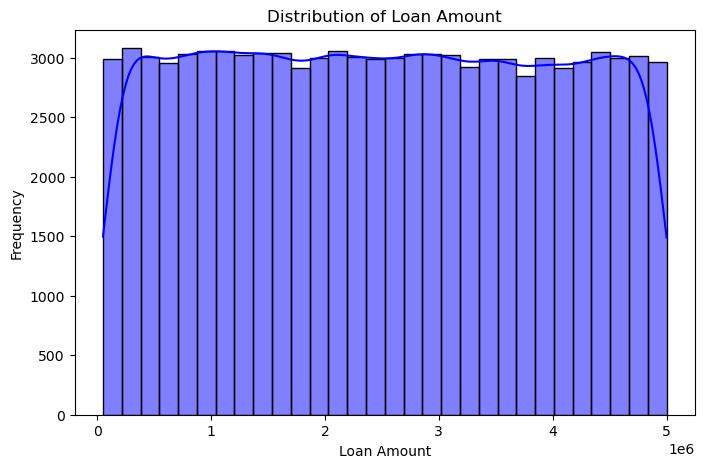

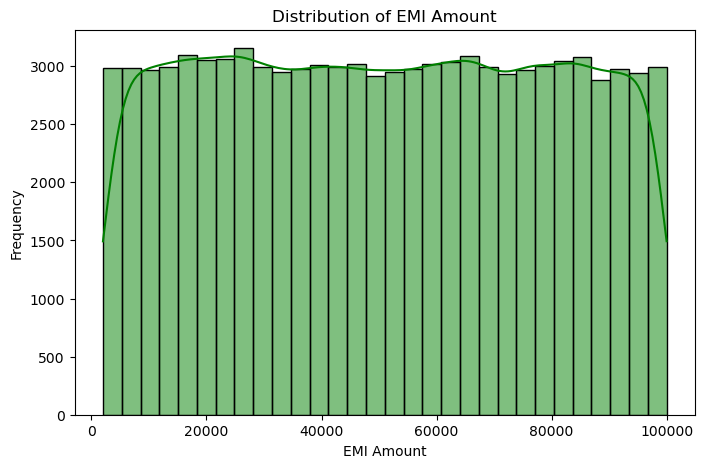

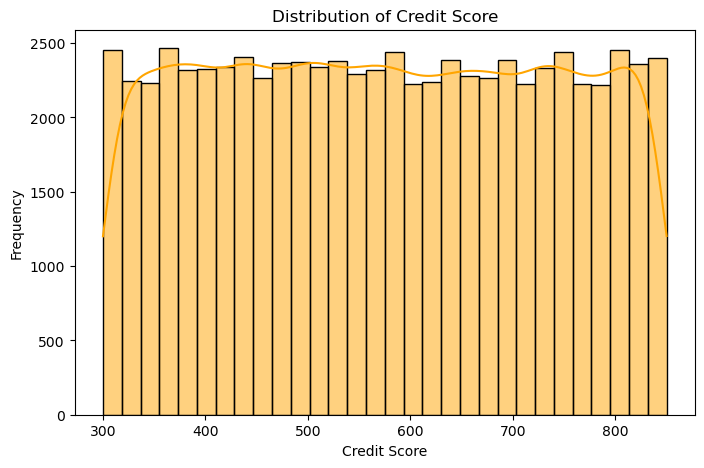

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Loan_Amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(loans_df['Loan_Amount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot EMI_Amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(loans_df['EMI_Amount'], kde=True, bins=30, color='green')
plt.title('Distribution of EMI Amount')
plt.xlabel('EMI Amount')
plt.ylabel('Frequency')
plt.show()

# Plot Credit_Score distribution
plt.figure(figsize=(8, 5))
sns.histplot(customers_df['Credit_Score'], kde=True, bins=30, color='orange')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


2.2 Regional Trends
Objective: Analyze loan disbursement and default rates by region.
Dataset: 
Used branches_df for regional loan disbursement
Used defaults_df for defaults merging with customers_df

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\652768903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_disbursement, x='Region', y='Loan_Disbursement_Amount', palette='Blues')


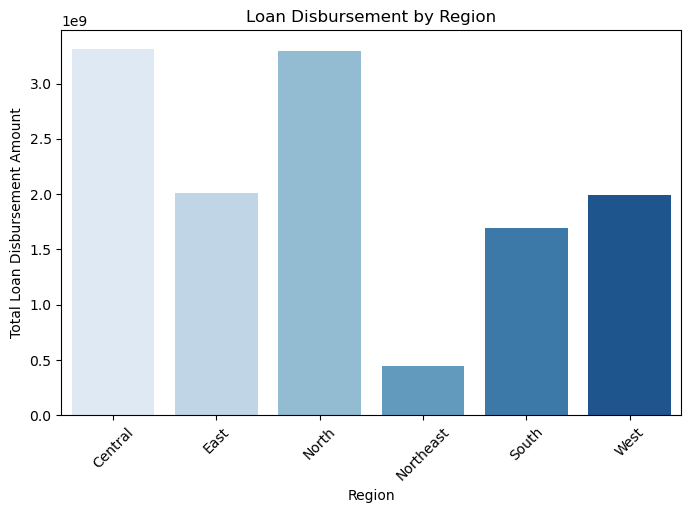

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\652768903.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_defaults, x='Region', y='Default_Amount', palette='Reds')


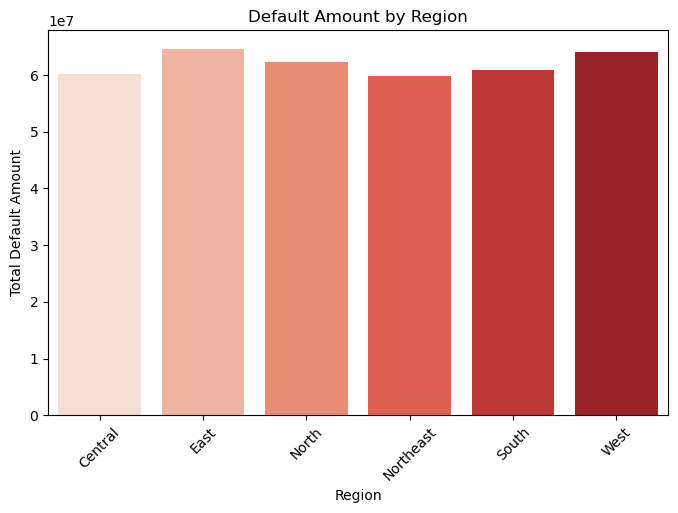

In [71]:
# Loan Disbursement by Region
regional_disbursement = branches_df.groupby('Region')['Loan_Disbursement_Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=regional_disbursement, x='Region', y='Loan_Disbursement_Amount', palette='Blues')
plt.title('Loan Disbursement by Region')
plt.xlabel('Region')
plt.ylabel('Total Loan Disbursement Amount')
plt.xticks(rotation=45)
plt.show()

# Default Rates by Region
defaults_by_region = defaults_df.merge(customers_df, on='Customer_ID')
regional_defaults = defaults_by_region.groupby('Region')['Default_Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=regional_defaults, x='Region', y='Default_Amount', palette='Reds')
plt.title('Default Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Default Amount')
plt.xticks(rotation=45)
plt.show()


3: Default Risk Analysis

3.1 Correlation Between Loan Attributes and Defaults
Objective: Understand how Loan_Amount, Interest_Rate, and Credit_Score relate to the probability of default.
Data Preparation: Add a binary column (Default_Flag) to indicate whether a loan defaulted (1) or not (0).

Correlation Matrix:
               Loan_Amount  Interest_Rate  Credit_Score  Default_Flag
Loan_Amount       1.000000      -0.002973      0.000417      0.000632
Interest_Rate    -0.002973       1.000000      0.002840      0.002923
Credit_Score      0.000417       0.002840      1.000000      0.001243
Default_Flag      0.000632       0.002923      0.001243      1.000000


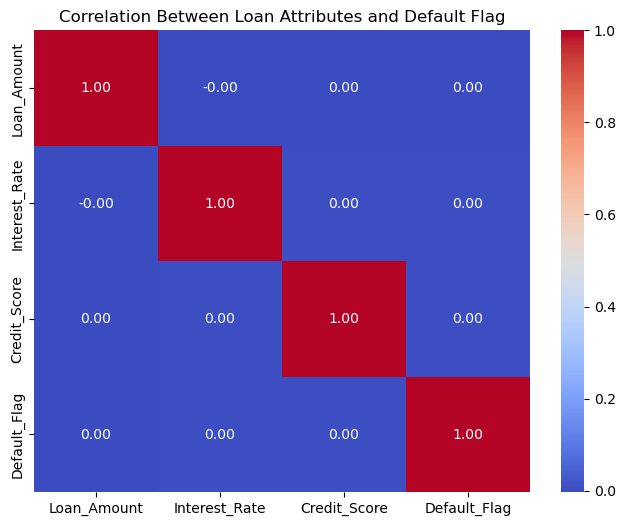

In [59]:
# Merge defaults with loans and customers
loan_defaults = loans_df.merge(defaults_df, on='Customer_ID', how='left')
loan_defaults = loan_defaults.merge(customers_df[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')

# Create Default_Flag: 1 if defaulted, else 0
loan_defaults['Default_Flag'] = loan_defaults['Default_Amount'].notna().astype(int)

# Calculate correlation
correlation_matrix = loan_defaults[['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Loan Attributes and Default Flag")
plt.show()


3.2 Pairwise Correlation Analysis
Objective: Visualize pairwise correlations between key variables like EMI_Amount, Overdue_Amount, and Default_Amount.

Pairwise Correlation Matrix:
                EMI_Amount  Overdue_Amount  Default_Amount
EMI_Amount        1.000000       -0.000128        0.007256
Overdue_Amount   -0.000128        1.000000       -0.001174
Default_Amount    0.007256       -0.001174        1.000000


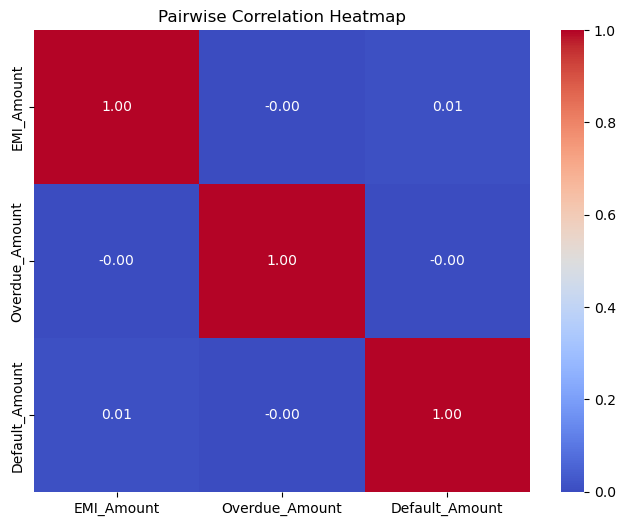

In [61]:
# Subset for pairwise correlation
pairwise_data = loan_defaults[['EMI_Amount', 'Overdue_Amount', 'Default_Amount']]

# Calculate correlation
pairwise_correlation = pairwise_data.corr()

print("Pairwise Correlation Matrix:")
print(pairwise_correlation)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pairwise_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pairwise Correlation Heatmap")
plt.show()


3.3 Correlation Between Branch Metrics and Defaults
Objective: Analyze how branch-level metrics like Delinquent_Loans and Loan_Disbursement_Amount relate to default rates.
Note: No matching/common field in branches_df to map with defaults_df

In [ ]:
# Calculate default rate per branch: No matching/common field in branches_df to map with defaults_df

4. Branch and Regional Performance

4.1 Rank Branches by Loan Disbursement Volume
Objective: Identify branches with the highest loan disbursement volumes.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3320443169.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_branches, x='Branch_ID', y='Loan_Disbursement_Amount', palette='Blues')


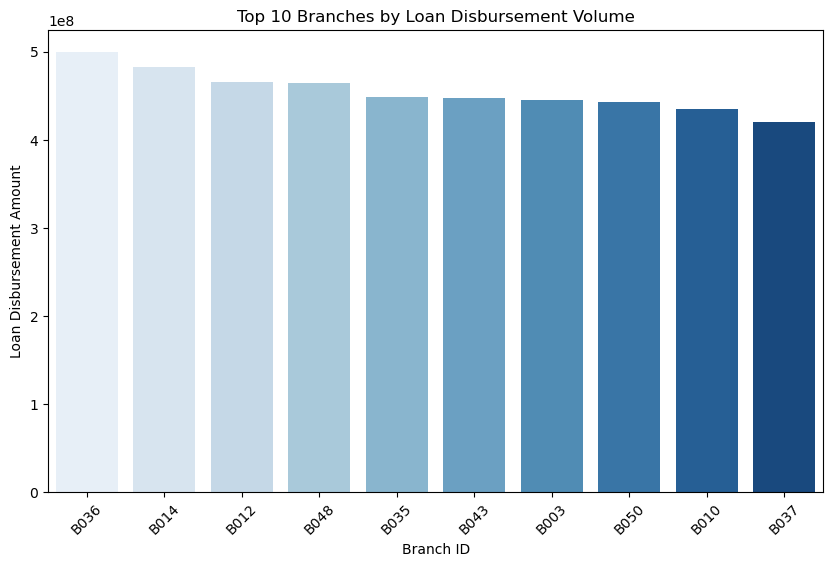

In [80]:
# Aggregate disbursement volume by branch
branch_disbursement = branches_df.groupby('Branch_ID')['Loan_Disbursement_Amount'].sum().reset_index()

# Rank branches by disbursement volume
branch_disbursement['Rank_Disbursement'] = branch_disbursement['Loan_Disbursement_Amount'].rank(ascending=False)

# Visualize top branches
top_branches = branch_disbursement.sort_values(by='Loan_Disbursement_Amount', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_branches, x='Branch_ID', y='Loan_Disbursement_Amount', palette='Blues')
plt.title('Top 10 Branches by Loan Disbursement Volume')
plt.xlabel('Branch ID')
plt.ylabel('Loan Disbursement Amount')
plt.xticks(rotation=45)
plt.show()


4.2 Rank Branches by Processing Time Efficiency
Objective: Rank branches by the average time taken to process loan applications.
Data Needed: applications_df (use Application_Date and Approval_Date).

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\250968278.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fast_branches, x='Branch_ID', y='Avg_Processing_Time', palette='Greens')


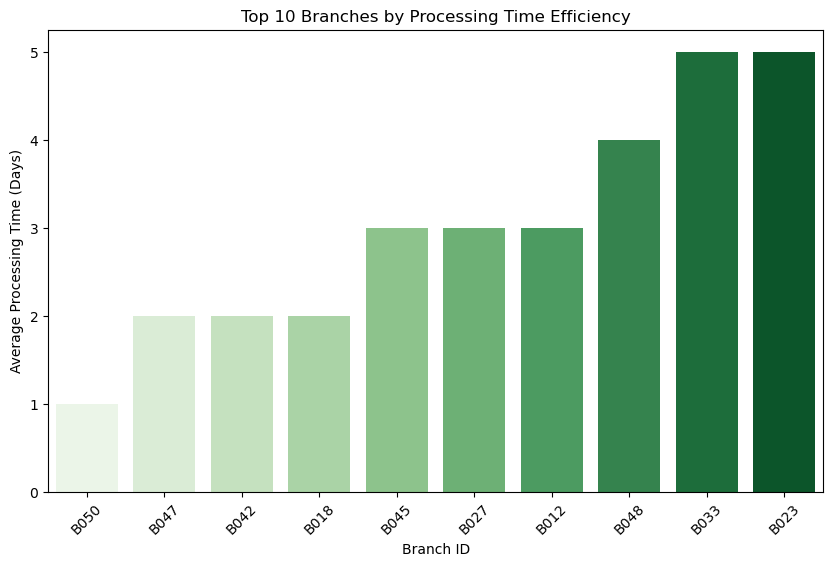

In [199]:
# Aggregate average processing time by branch
processing_time = branches_df[['Branch_ID','Avg_Processing_Time']].reset_index()

# Rank branches by processing time
processing_time['Rank_Processing'] = branches_df['Avg_Processing_Time'].rank()


# Visualize branches with the fastest processing times
fast_branches = processing_time.sort_values(by='Avg_Processing_Time').head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=fast_branches, x='Branch_ID', y='Avg_Processing_Time', palette='Greens')
plt.title('Top 10 Branches by Processing Time Efficiency')
plt.xlabel('Branch ID')
plt.ylabel('Average Processing Time (Days)')
plt.xticks(rotation=45)
plt.show()


4.3 Rank Branches by Default Rates and Recovery Rates
Objective: Rank branches based on their default rates and recovery performance.

In [ ]:
# Aggregate defaults and recovery data by branch: No matching/common field in branches_df to map with defaults_df

5. Customer Segmentation

5.1 Segment Customers by Income, Credit Score, and Loan Status
Objective: Group customers based on their income, credit score, and loan repayment behavior.

In [96]:
# Segment customers by Income and Credit Score
customers_df['Income_Segment'] = pd.cut(customers_df['Annual_Income'], 
                                        bins=[0, 500000, 1000000, 1500000, float('inf')], 
                                        labels=['Low', 'Medium', 'High', 'Very High'])

customers_df['Credit_Score_Segment'] = pd.cut(customers_df['Credit_Score'], 
                                              bins=[0, 300, 600, 750, 900], 
                                              labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Merge loan status with customer data
customer_loan_status = loans_df.merge(defaults_df[['Loan_ID']], on='Loan_ID', how='left', indicator=True)
customer_loan_status['Loan_Status'] = customer_loan_status['_merge'].map({'both': 'Defaulted', 'left_only': 'Active'})
customer_segments = customers_df.merge(customer_loan_status[['Customer_ID', 'Loan_Status']], on='Customer_ID')

# Segment counts
segmentation_summary = customer_segments.groupby(['Income_Segment', 'Credit_Score_Segment', 'Loan_Status']).size().reset_index(name='Count')
segmentation_summary


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\490151958.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segmentation_summary = customer_segments.groupby(['Income_Segment', 'Credit_Score_Segment', 'Loan_Status']).size().reset_index(name='Count')


,Income_Segment,Credit_Score_Segment,Loan_Status,Count
0,Low,Poor,Active,23
1,Low,Poor,Defaulted,4
2,Low,Fair,Active,7471
3,Low,Fair,Defaulted,851
4,Low,Good,Active,3582
5,Low,Good,Defaulted,420
6,Low,Excellent,Active,2437
7,Low,Excellent,Defaulted,251
8,Medium,Poor,Active,48
9,Medium,Poor,Defaulted,3


5.2 Identify High-Risk and High-Value Customer Groups
High-Risk: Customers with low credit scores, low income, and default history.
High-Value: Customers with high income, excellent credit scores, and active loans.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3137390374.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_risk_summary, x='Region', y='High_Risk_Count', palette='Reds')


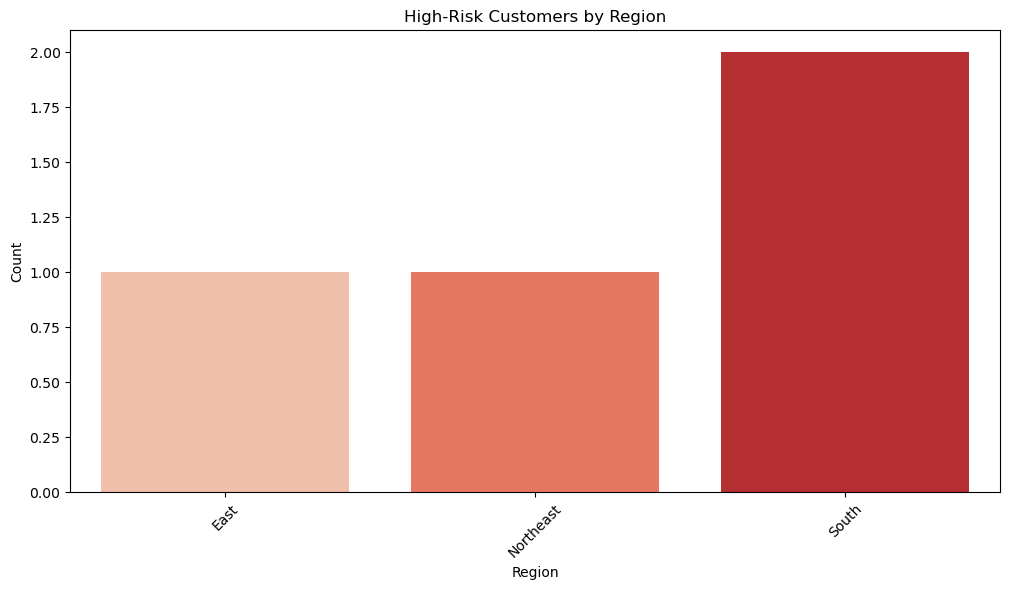

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3137390374.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_value_summary, x='Region', y='High_Value_Count', palette='Greens')


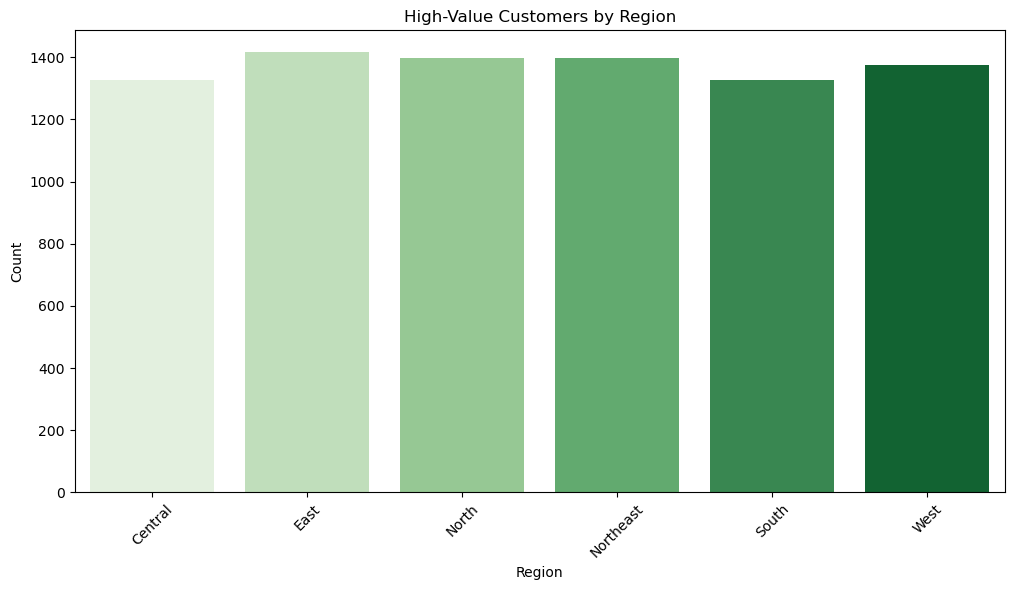

In [102]:
# Identify High-Risk Customers
high_risk_customers = customer_segments[
    (customer_segments['Income_Segment'] == 'Low') &
    (customer_segments['Credit_Score_Segment'] == 'Poor') &
    (customer_segments['Loan_Status'] == 'Defaulted')
]

# Identify High-Value Customers
high_value_customers = customer_segments[
    (customer_segments['Income_Segment'].isin(['High', 'Very High'])) &
    (customer_segments['Credit_Score_Segment'] == 'Excellent') &
    (customer_segments['Loan_Status'] == 'Active')
]

# Summary
high_risk_summary = high_risk_customers.groupby('Region').size().reset_index(name='High_Risk_Count')
high_value_summary = high_value_customers.groupby('Region').size().reset_index(name='High_Value_Count')

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=high_risk_summary, x='Region', y='High_Risk_Count', palette='Reds')
plt.title('High-Risk Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=high_value_summary, x='Region', y='High_Value_Count', palette='Greens')
plt.title('High-Value Customers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


5.3 Analyze Repayment Behavior Across Segments
Objective: Explore repayment patterns based on income, credit score, and loan status.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\1077480445.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  repayment_behavior = transaction_analysis[transaction_analysis['Payment_Type'] == 'EMI'].groupby(


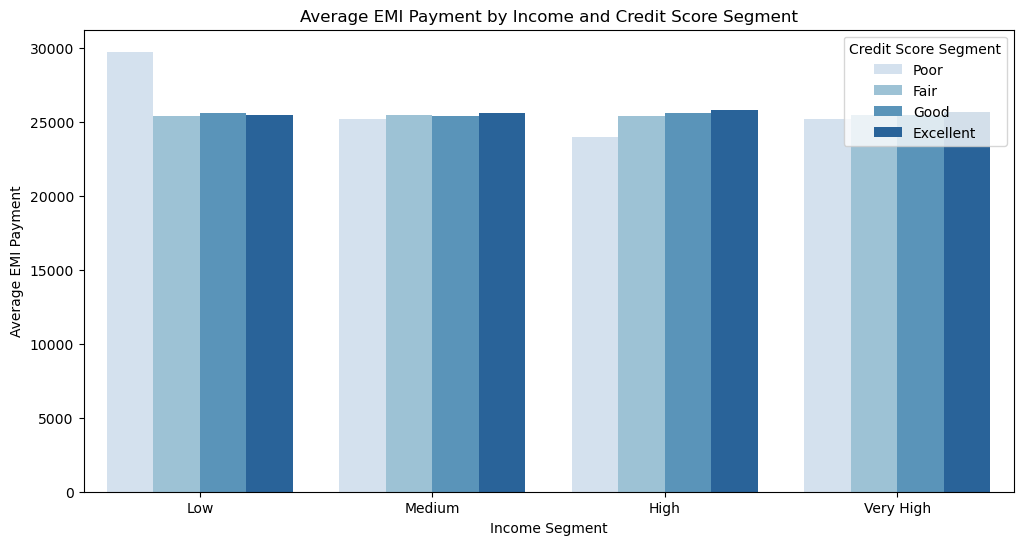

In [221]:
# Merge transactions with loan and customer data
transaction_analysis = transactions_df.merge(customer_segments[['Customer_ID', 'Income_Segment', 'Credit_Score_Segment']], on='Customer_ID')

# Aggregate repayment behavior
repayment_behavior = transaction_analysis[transaction_analysis['Payment_Type'] == 'EMI'].groupby(
    ['Income_Segment', 'Credit_Score_Segment']
).agg({
    'Amount': 'mean',  # Average EMI Payment
    'Loan_ID': 'count'  # Number of EMI Payments
}).reset_index().rename(columns={'Amount': 'Avg_EMI_Amount', 'Loan_ID': 'Total_EMI_Count'})

# Visualization: Average EMI Payment by Segment
plt.figure(figsize=(12, 6))
sns.barplot(data=repayment_behavior, x='Income_Segment', y='Avg_EMI_Amount', hue='Credit_Score_Segment', palette='Blues')
plt.title('Average EMI Payment by Income and Credit Score Segment')
plt.xlabel('Income Segment')
plt.ylabel('Average EMI Payment')
plt.legend(title='Credit Score Segment')
plt.show()


6. Advanced Statistical Analysis

6.1 Correlation Analysis for Default Risks
Objective: Analyze correlations among variables like Credit_Score, Loan_Amount, Interest_Rate, Overdue_Amount, and Default_Flag.

In [139]:
# Merge loans, defaults, and customers for correlation analysis
# default_risk_data = loans_df.merge(defaults_df[['Customer_ID','Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')
default_risk_data = loans_df.merge(defaults_df[['Customer_ID','Loan_ID', 'Default_Amount']], on=['Customer_ID','Loan_ID'], how='left')
default_risk_data = default_risk_data.merge(customers_df[['Customer_ID','Credit_Score']], on='Customer_ID', how='left')
default_risk_data['Default_Flag'] = default_risk_data['Default_Amount'].notna().astype(int)

# Select relevant columns for correlation
default_risk_corr_data = default_risk_data[['Credit_Score', 'Loan_Amount', 'Interest_Rate', 'Default_Flag']].dropna()

# Correlation matrix
correlation_matrix = default_risk_corr_data.corr()

# Display correlation matrix
print(correlation_matrix)


               Credit_Score  Loan_Amount  Interest_Rate  Default_Flag
Credit_Score       1.000000     0.000139       0.002457           NaN
Loan_Amount        0.000139     1.000000      -0.003201           NaN
Interest_Rate      0.002457    -0.003201       1.000000           NaN
Default_Flag            NaN          NaN            NaN           NaN


6.2 Pairwise Correlation Heatmap
Objective: Visualize correlations among key variables: EMI_Amount, Recovery_Rate, and Default_Amount.

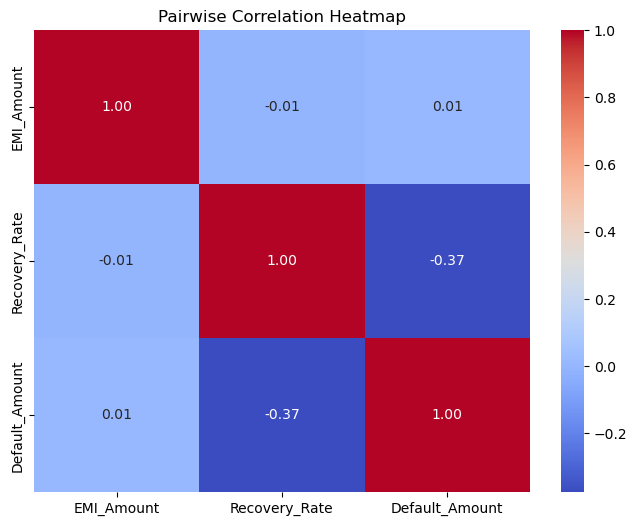

In [141]:
# Prepare data for heatmap
heatmap_data = defaults_df.merge(loans_df[['Loan_ID', 'EMI_Amount']], on='Loan_ID', how='left')
heatmap_data['Recovery_Rate'] = heatmap_data['Recovery_Amount'] / heatmap_data['Default_Amount']
heatmap_corr = heatmap_data[['EMI_Amount', 'Recovery_Rate', 'Default_Amount']].corr()

# Generate heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_corr, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Pairwise Correlation Heatmap')
plt.show()


6.3 Branch-Level Correlation
Objective: Explore correlations between branch-level metrics such as Delinquent_Loans, Loan_Disbursement_Amount, Recovery_Rate, and overall efficiency.

In [ ]:
# Calculate Recovery Rate for each branch: No matching/common field in branches_df to map with defaults_df

In [285]:
# Calculate Recovery Rate for each region
region_performance = defaults_df.merge(customers_df[['Customer_ID','Region']], on='Customer_ID', how='left')
region_performance = region_performance.merge(loans_df[['Customer_ID','Loan_Amount']], on='Customer_ID', how='left')
region_performance = region_performance.groupby('Region')[['Recovery_Amount','Default_Amount','Loan_Amount']].sum()
# region_performance = region_performance.merge(branches_df, on='Region', how='left')
# .groupby('Region')[['Delinquent_Loans', 'Loan_Disbursement_Amount', 'Recovery_Amount','Default_Amount','Loan_Amount']].sum()
region_performance

,Recovery_Amount,Default_Amount,Loan_Amount
Region,,,
Central,22897997,93328556,3.626140e+09
East,23130936,104303371,4.096692e+09
North,25043603,98662126,4.020956e+09
Northeast,21982056,90059341,3.536231e+09
South,23831651,95533542,3.702233e+09
West,23753291,99615267,3.709502e+09


In [273]:
# Calculate Recovery Rate for each region
region_performance = defaults_df.merge(customers_df[['Customer_ID','Region']], on='Customer_ID', how='left').merge(loans_df[['Customer_ID','Loan_Amount']], on='Customer_ID', how='left').merge(branches_df, on='Region', how='left').groupby('Region')[['Delinquent_Loans', 'Loan_Disbursement_Amount', 'Recovery_Amount','Default_Amount','Loan_Amount']].sum()
region_performance = region_performance.rename(columns={'Recovery_Amount': 'Total_Recovery_Amount', 'Default_Amount': 'Total_Default_Amount', 'Loan_Amount': 'Total Loan Amount'})
region_performance['Recovery_Rate'] = region_performance['Total_Recovery_Amount'] / region_performance['Total_Default_Amount']

region_performance


,Delinquent_Loans,Loan_Disbursement_Amount,Total_Recovery_Amount,Total_Default_Amount,Total Loan Amount,Recovery_Rate
Region,,,,,,
Central,1783236.0,5.948991e+12,228979970,933285560,3.626140e+10,0.245348
East,1461348.0,3.878905e+12,185047488,834426968,3.277354e+10,0.221766
North,2791424.0,6.117513e+12,350610442,1381269764,5.629339e+10,0.253832
Northeast,851763.0,7.745059e+11,87928224,360237364,1.414492e+10,0.244084
South,1522800.0,3.050832e+12,190653208,764268336,2.961786e+10,0.249458
West,797328.0,3.599418e+12,142519746,597691602,2.225701e+10,0.238450


In [ ]:



# Calculate Recovery Rate for each branch
branch_performance = branches_df.copy()
branch_performance['Recovery_Rate'] = defaults_df.groupby('Branch_ID')['Recovery_Amount'].sum() / defaults_df.groupby('Branch_ID')['Default_Amount'].sum()
branch_performance = branch_performance.merge(loans_df.groupby('Branch_ID')['Loan_Amount'].sum().reset_index(name='Total_Loan_Amount'), on='Branch_ID', how='left')

# Select relevant columns for correlation
branch_corr_data = branch_performance[['Delinquent_Loans', 'Loan_Disbursement_Amount', 'Recovery_Rate', 'Total_Loan_Amount']].dropna()

# Correlation matrix
branch_correlation = branch_corr_data.corr()

# Generate heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(branch_correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Branch-Level Correlation Heatmap')
plt.show()


7. Transaction and Recovery Analysis

7.1 Penalty Payments and Overdue Trends
Objective: Analyze trends in penalty payments and overdue amounts to understand patterns and behaviors.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\283556804.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penalty_data['Transaction_Date'] = penalty_data['Transaction_Date'].dt.to_period('M')


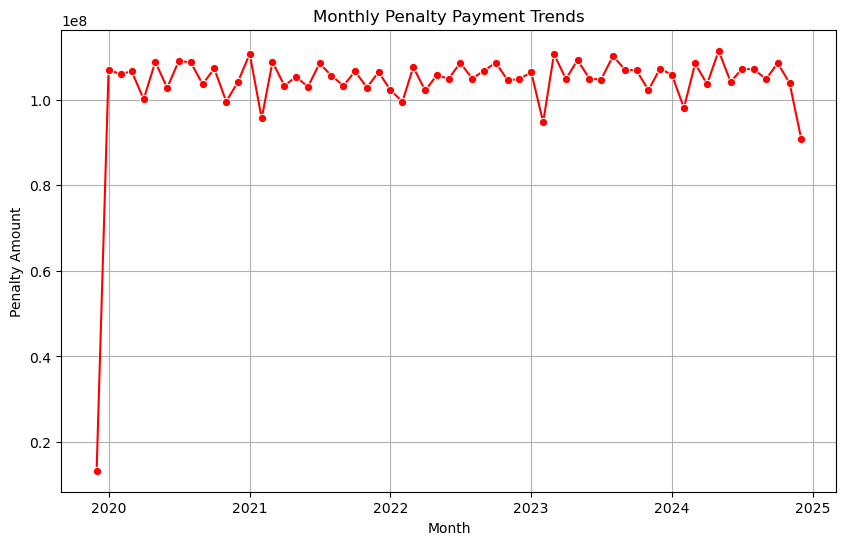

In [175]:
# Ensure Transaction_Date is in datetime format
transactions_df['Transaction_Date'] = pd.to_datetime(transactions_df['Transaction_Date'], errors='coerce')

# Filter penalty payments from transactions
penalty_data = transactions_df[transactions_df['Payment_Type'] == 'Penalty']

# Aggregate penalty amounts by month
penalty_data['Transaction_Date'] = penalty_data['Transaction_Date'].dt.to_period('M')
penalty_trends = penalty_data.groupby('Transaction_Date')['Amount'].sum().reset_index()
penalty_trends['Transaction_Date'] = penalty_trends['Transaction_Date'].dt.to_timestamp()

# Visualize penalty trends
plt.figure(figsize=(10, 6))
sns.lineplot(x='Transaction_Date', y='Amount', data=penalty_trends, marker='o', color='red')
plt.title('Monthly Penalty Payment Trends')
plt.xlabel('Month')
plt.ylabel('Penalty Amount')
plt.grid(True)
plt.show()


7.2 Recovery Rates by Default Reason and Legal Action
Objective: Evaluate recovery rates based on Default_Reason and whether legal actions were taken.

In [155]:
# Calculate recovery rate by Default_Reason
recovery_by_reason = defaults_df.groupby('Default_Reason').agg(
    Total_Default_Amount=('Default_Amount', 'sum'),
    Total_Recovery_Amount=('Recovery_Amount', 'sum')
).reset_index()
recovery_by_reason['Recovery_Rate'] = recovery_by_reason['Total_Recovery_Amount'] / recovery_by_reason['Total_Default_Amount']

# Recovery rate based on Legal_Action
recovery_by_legal = defaults_df.groupby('Legal_Action').agg(
    Total_Default_Amount=('Default_Amount', 'sum'),
    Total_Recovery_Amount=('Recovery_Amount', 'sum')
).reset_index()
recovery_by_legal['Recovery_Rate'] = recovery_by_legal['Total_Recovery_Amount'] / recovery_by_legal['Total_Default_Amount']

# Display recovery data
print("Recovery by Default Reason:")
print(recovery_by_reason)
print("\nRecovery by Legal Action:")
print(recovery_by_legal)


Recovery by Default Reason:
      Default_Reason  Total_Default_Amount  Total_Recovery_Amount  \
0   Business Failure             121925983               29818593   
1           Job Loss             113477409               26835222   
2  Medical Emergency             119083296               30263160   
3              Other             122321069               29002838   

   Recovery_Rate  
0       0.244563  
1       0.236481  
2       0.254134  
3       0.237104  

Recovery by Legal Action:
  Legal_Action  Total_Default_Amount  Total_Recovery_Amount  Recovery_Rate
0           No             242087969               58458449       0.241476
1          Yes             234719788               57461364       0.244808


7.3 Recovery Rates Across Regions and Branches
Objective: Compare recovery performance across regions and branches.

No matching/common field in branches_df

8. EMI Analysis
Analyze the relationship between EMI amounts and default probabilities.
Identify thresholds for EMI amounts where defaults are most likely.
Compare EMI trends across loan types.

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3037328965.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default_prob = emi_defaults_data.groupby('EMI_Bin')['Default_Flag'].mean().reset_index()
C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3037328965.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EMI_Bin', y='Default_Flag', data=emi_default_prob, palette='viridis')


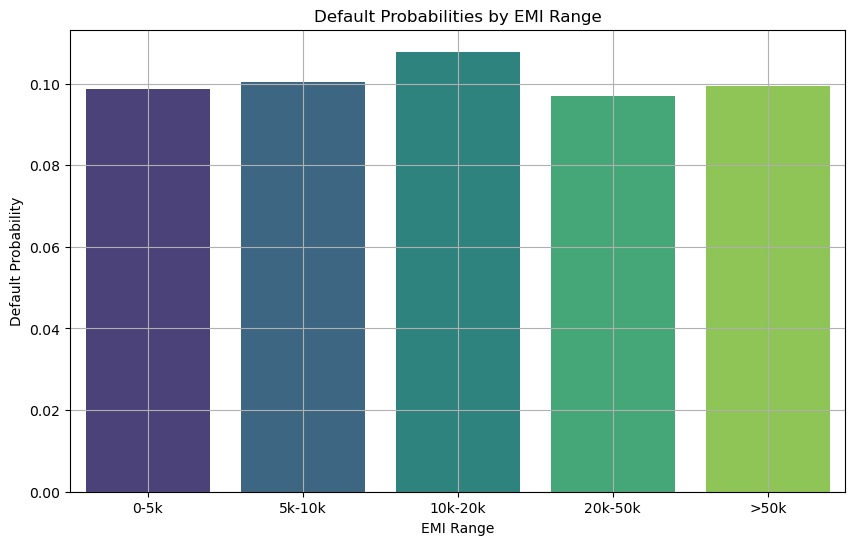

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3037328965.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_loan_type = emi_defaults_data.groupby(['Loan_Purpose', 'EMI_Bin'])['Default_Flag'].mean().reset_index()


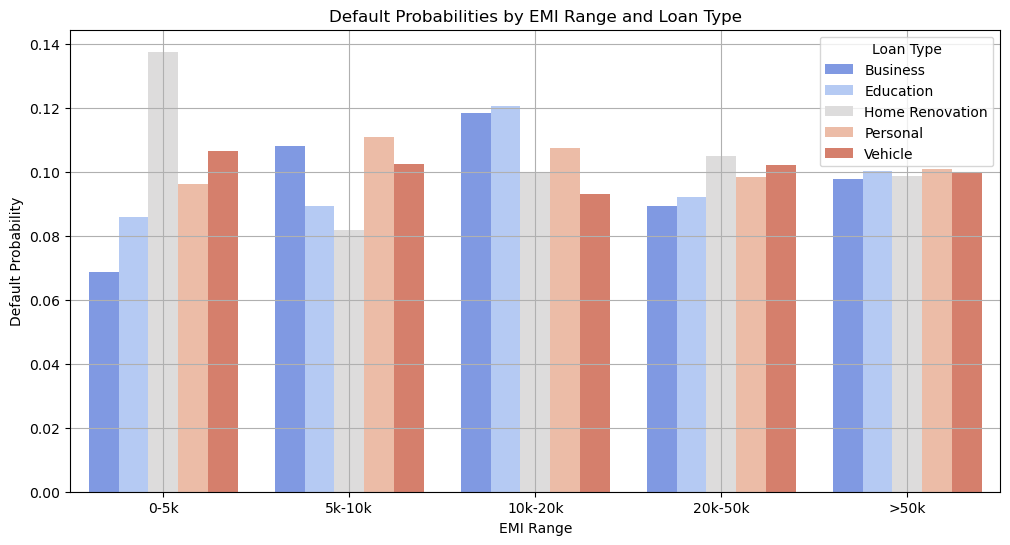

In [291]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Merge loans and defaults datasets
emi_defaults_data = loans_df.merge(defaults_df, on='Loan_ID', how='left')

# Merge applications datasets
emi_defaults_data = emi_defaults_data.merge(applications_df[['Loan_ID','Loan_Purpose']], on='Loan_ID', how='left')

# Fill NaN in Default_Amount (indicating no default) with 0
emi_defaults_data['Default_Flag'] = np.where(emi_defaults_data['Default_Amount'].notna(), 1, 0)

# Calculate EMI Amount
emi_defaults_data['EMI_Amount'] = (
    emi_defaults_data['Loan_Amount'] * emi_defaults_data['Interest_Rate'] / 1200
) / (1 - (1 + emi_defaults_data['Interest_Rate'] / 1200) ** -emi_defaults_data['Loan_Term'])

# Bin EMI amounts into ranges
emi_bins = pd.cut(emi_defaults_data['EMI_Amount'], bins=[0, 5000, 10000, 20000, 50000, np.inf], labels=['0-5k', '5k-10k', '10k-20k', '20k-50k', '>50k'])
emi_defaults_data['EMI_Bin'] = emi_bins

# Calculate default probabilities for each EMI range
emi_default_prob = emi_defaults_data.groupby('EMI_Bin')['Default_Flag'].mean().reset_index()

# Plot default probabilities
plt.figure(figsize=(10, 6))
sns.barplot(x='EMI_Bin', y='Default_Flag', data=emi_default_prob, palette='viridis')
plt.title('Default Probabilities by EMI Range')
plt.xlabel('EMI Range')
plt.ylabel('Default Probability')
plt.grid(True)
plt.show()

# Analyze EMI trends by Loan Type
emi_loan_type = emi_defaults_data.groupby(['Loan_Purpose', 'EMI_Bin'])['Default_Flag'].mean().reset_index()

# Visualize EMI trends across Loan Types
plt.figure(figsize=(12, 6))
sns.barplot(x='EMI_Bin', y='Default_Flag', hue='Loan_Purpose', data=emi_loan_type, palette='coolwarm')
plt.title('Default Probabilities by EMI Range and Loan Type')
plt.xlabel('EMI Range')
plt.ylabel('Default Probability')
plt.legend(title='Loan Type')
plt.grid(True)
plt.show()


Approval and Rejection Rates:
Approval_Status
Approved    84.745763
Rejected    15.254237
Name: count, dtype: float64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\2669832511.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=approval_rejection_counts.index, y=approval_rejection_rates, palette="viridis")


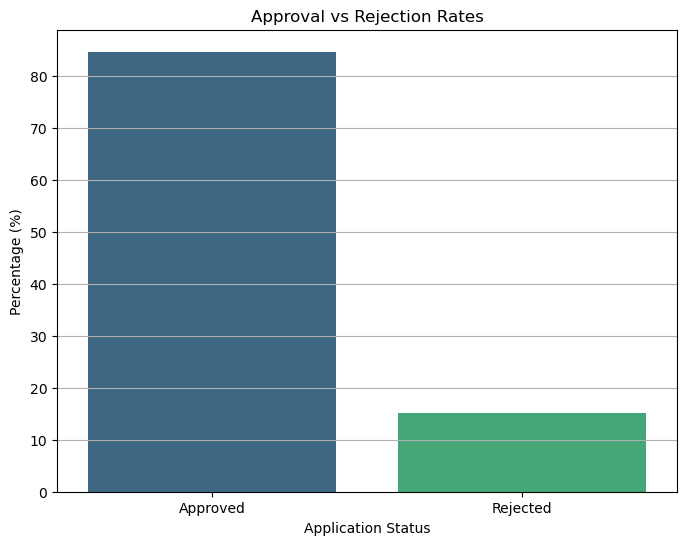

Most Common Rejection Reasons:
Rejection_Reason
Low Credit Score        4297
Incomplete Documents    4204
Insufficient Income     4099
Name: count, dtype: int64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\2669832511.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rejection_reasons.index, y=rejection_reasons.values, palette="coolwarm")


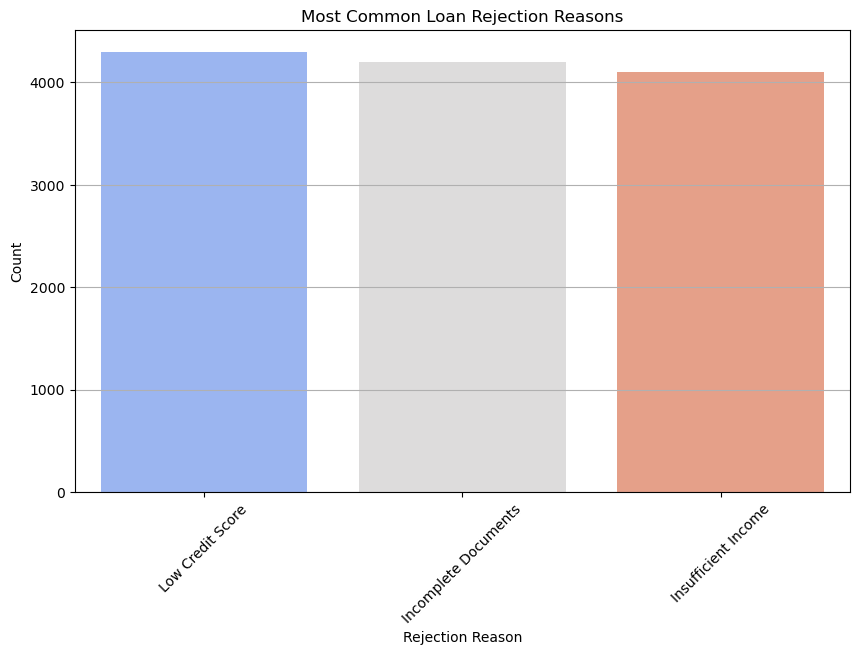

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\2669832511.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Approval_Status', y='Processing_Fee', data=applications_df, palette="Set2")


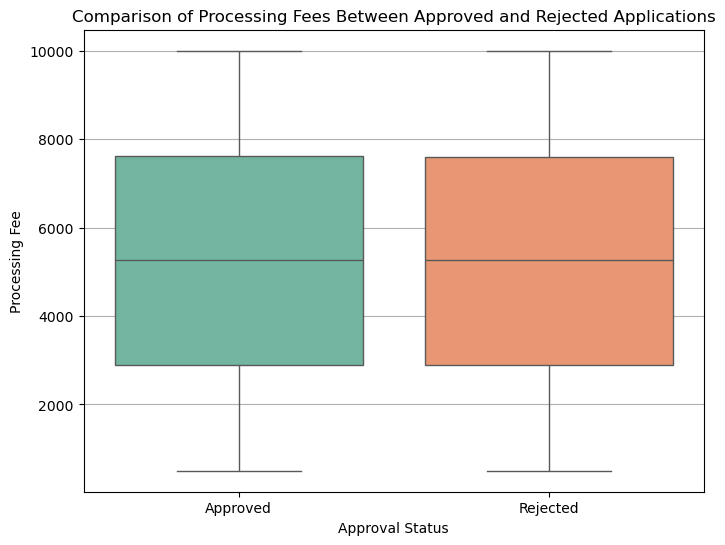

Processing Fee Statistics - Approved Applications:
count    70000.000000
mean      5252.395014
std       2741.573413
min        500.000000
25%       2895.000000
50%       5256.000000
75%       7626.000000
max      10000.000000
Name: Processing_Fee, dtype: float64

Processing Fee Statistics - Rejected Applications:
count    12600.000000
mean      5255.141587
std       2721.010522
min        500.000000
25%       2897.500000
50%       5271.000000
75%       7602.000000
max       9998.000000
Name: Processing_Fee, dtype: float64


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate approval and rejection rates
approval_rejection_counts = applications_df['Approval_Status'].value_counts()
approval_rejection_rates = approval_rejection_counts / len(applications_df) * 100

print("Approval and Rejection Rates:")
print(approval_rejection_rates)

# Plot approval and rejection rates
plt.figure(figsize=(8, 6))
sns.barplot(x=approval_rejection_counts.index, y=approval_rejection_rates, palette="viridis")
plt.title("Approval vs Rejection Rates")
plt.xlabel("Application Status")
plt.ylabel("Percentage (%)")
plt.grid(axis='y')
plt.show()

# 2. Identify the most common reasons for loan rejection
rejection_reasons = applications_df[applications_df['Approval_Status'] == 'Rejected']['Rejection_Reason'].value_counts()

print("Most Common Rejection Reasons:")
print(rejection_reasons)

# Plot rejection reasons
plt.figure(figsize=(10, 6))
sns.barplot(x=rejection_reasons.index, y=rejection_reasons.values, palette="coolwarm")
plt.title("Most Common Loan Rejection Reasons")
plt.xlabel("Rejection Reason")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Compare processing fees between approved and rejected applications
approved_apps = applications_df[applications_df['Approval_Status'] == 'Approved']
rejected_apps = applications_df[applications_df['Approval_Status'] == 'Rejected']

# Boxplot comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Approval_Status', y='Processing_Fee', data=applications_df, palette="Set2")
plt.title("Comparison of Processing Fees Between Approved and Rejected Applications")
plt.xlabel("Approval Status")
plt.ylabel("Processing Fee")
plt.grid(axis='y')
plt.show()

# Print summary statistics for processing fees
approved_fees = approved_apps['Processing_Fee'].describe()
rejected_fees = rejected_apps['Processing_Fee'].describe()

print("Processing Fee Statistics - Approved Applications:")
print(approved_fees)
print("\nProcessing Fee Statistics - Rejected Applications:")
print(rejected_fees)


10. Recovery Effectiveness
Determine the effectiveness of recovery efforts by calculating the ratio of Recovery_Amount to Default_Amount.
Compare recovery rates for defaults with and without legal actions.
Analyze branch-wise recovery performance.

Recovery Rate Statistics:
count    9000.000000
mean        0.404558
std         0.830931
min         0.000000
25%         0.000000
50%         0.022770
75%         0.482636
max         9.546509
Name: Recovery_Rate, dtype: float64


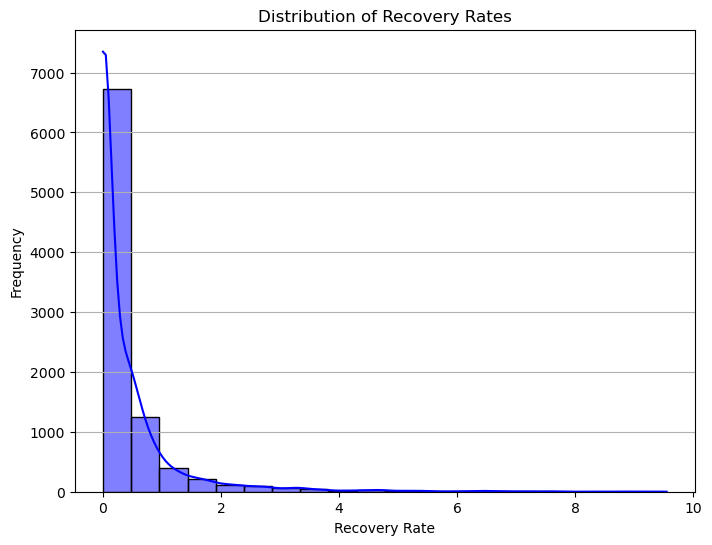

Average Recovery Rate by Legal Action:
Legal_Action
No     0.401805
Yes    0.407372
Name: Recovery_Rate, dtype: float64


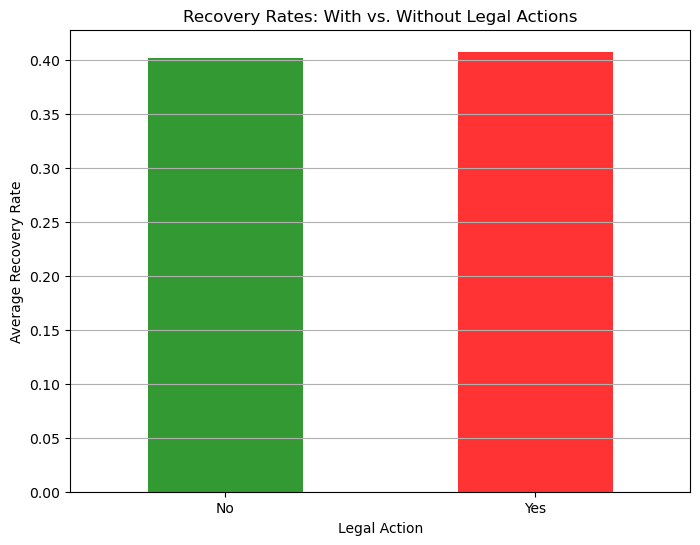

The dataset does not include a column for 'Branch_ID'.


In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate Recovery Ratio
defaults_df['Recovery_Rate'] = defaults_df['Recovery_Amount'] / defaults_df['Default_Amount']
recovery_stats = defaults_df['Recovery_Rate'].describe()

print("Recovery Rate Statistics:")
print(recovery_stats)

# Plot distribution of recovery rates
plt.figure(figsize=(8, 6))
sns.histplot(defaults_df['Recovery_Rate'], bins=20, kde=True, color="blue")
plt.title("Distribution of Recovery Rates")
plt.xlabel("Recovery Rate")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# 2. Compare Recovery Rates for Legal Actions
if 'Legal_Action' in defaults_df.columns:
    recovery_by_legal_action = defaults_df.groupby('Legal_Action')['Recovery_Rate'].mean()

    print("Average Recovery Rate by Legal Action:")
    print(recovery_by_legal_action)

    # Bar plot for recovery rates by legal action
    plt.figure(figsize=(8, 6))
    recovery_by_legal_action.plot(kind='bar', color=["green", "red"], alpha=0.8)
    plt.title("Recovery Rates: With vs. Without Legal Actions")
    plt.xlabel("Legal Action")
    plt.ylabel("Average Recovery Rate")
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()
else:
    print("The dataset does not include a column for 'Legal_Action'.")

# 3. Branch-wise Recovery Performance
if 'Branch_ID' in defaults_df.columns:
    branch_recovery = defaults_df.groupby('Branch_ID').agg(
        Total_Default_Amount=('Default_Amount', 'sum'),
        Total_Recovery_Amount=('Recovery_Amount', 'sum')
    )
    branch_recovery['Branch_Recovery_Rate'] = branch_recovery['Total_Recovery_Amount'] / branch_recovery['Total_Default_Amount']

    print("Branch-wise Recovery Performance:")
    print(branch_recovery)

    # Sort and plot top-performing branches
    top_branches = branch_recovery.sort_values(by='Branch_Recovery_Rate', ascending=False).head(10)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_branches.index, y=top_branches['Branch_Recovery_Rate'], palette="viridis")
    plt.title("Top 10 Branches by Recovery Efficiency")
    plt.xlabel("Branch ID")
    plt.ylabel("Recovery Rate")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("The dataset does not include a column for 'Branch_ID'.")


11. Loan Disbursement Efficiency
Analyze the time from application to loan disbursement and identify bottlenecks.
Compare average processing times across branches.
Evaluate disbursement trends by loan purpose and region.

Time to Disbursement Statistics:
count    70000.000000
mean       172.191700
std        824.317006
min      -1822.000000
25%       -424.000000
50%        171.000000
75%        769.000000
max       2184.000000
Name: Time_to_Disbursement, dtype: float64


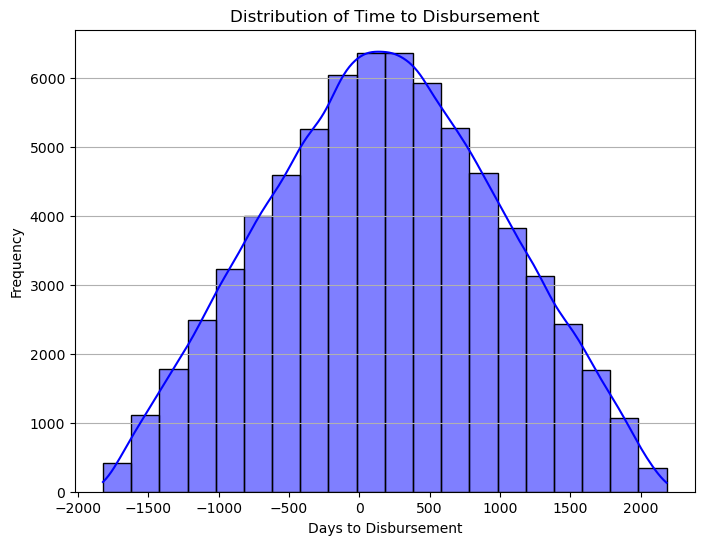

The dataset does not include a column for 'Branch_ID'.
The dataset does not include columns for 'Loan_Purpose' or 'Region'.


In [307]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge applications_df with loans_df on Loan_ID to connect application and disbursement data
merged_df = pd.merge(applications_df, loans_df, on='Loan_ID', how='inner')

# 1. Calculate Time to Disbursement
merged_df['Time_to_Disbursement'] = (
    pd.to_datetime(merged_df['Disbursal_Date']) - pd.to_datetime(merged_df['Application_Date'])
).dt.days

# Summary statistics for processing times
disbursement_stats = merged_df['Time_to_Disbursement'].describe()
print("Time to Disbursement Statistics:")
print(disbursement_stats)

# Histogram of processing times
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['Time_to_Disbursement'], bins=20, kde=True, color="blue")
plt.title("Distribution of Time to Disbursement")
plt.xlabel("Days to Disbursement")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# 2. Compare Average Processing Times Across Branches
if 'Branch_ID' in merged_df.columns:
    branch_processing_times = merged_df.groupby('Branch_ID')['Time_to_Disbursement'].mean().sort_values()

    print("Average Processing Times by Branch:")
    print(branch_processing_times)

    # Bar plot for branch processing times
    plt.figure(figsize=(10, 6))
    sns.barplot(x=branch_processing_times.index, y=branch_processing_times.values, palette="viridis")
    plt.title("Average Processing Times by Branch")
    plt.xlabel("Branch ID")
    plt.ylabel("Average Time to Disbursement (days)")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("The dataset does not include a column for 'Branch_ID'.")

# 3. Disbursement Trends by Loan Purpose and Region
if 'Loan_Purpose' in loans_df.columns and 'Region' in merged_df.columns:
    # Aggregate by loan purpose
    purpose_disbursement = loans_df.groupby('Loan_Purpose')['Loan_Amount'].sum().sort_values(ascending=False)

    print("Disbursement Trends by Loan Purpose:")
    print(purpose_disbursement)

    # Bar plot for loan purposes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=purpose_disbursement.index, y=purpose_disbursement.values, palette="coolwarm")
    plt.title("Loan Disbursement Trends by Purpose")
    plt.xlabel("Loan Purpose")
    plt.ylabel("Total Disbursement Amount")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    # Aggregate by region
    region_disbursement = merged_df.groupby('Region')['Loan_Amount'].sum().sort_values(ascending=False)

    print("Disbursement Trends by Region:")
    print(region_disbursement)

    # Bar plot for regions
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_disbursement.index, y=region_disbursement.values, palette="muted")
    plt.title("Loan Disbursement Trends by Region")
    plt.xlabel("Region")
    plt.ylabel("Total Disbursement Amount")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("The dataset does not include columns for 'Loan_Purpose' or 'Region'.")


12. Profitability Analysis
Calculate the total interest income generated across all loans.
Identify the most profitable loan purposes based on interest earnings.
Compare profitability metrics for branches across regions.

Total Interest Income Across All Loans: $19,384,690,860.48

Most Profitable Loan Purposes:
Loan_Purpose
Vehicle            3.910159e+09
Business           3.897290e+09
Education          3.867959e+09
Home Renovation    3.867924e+09
Personal           3.841360e+09
Name: Interest_Income, dtype: float64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\1100107443.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_profitability.index, y=purpose_profitability.values, palette="coolwarm")


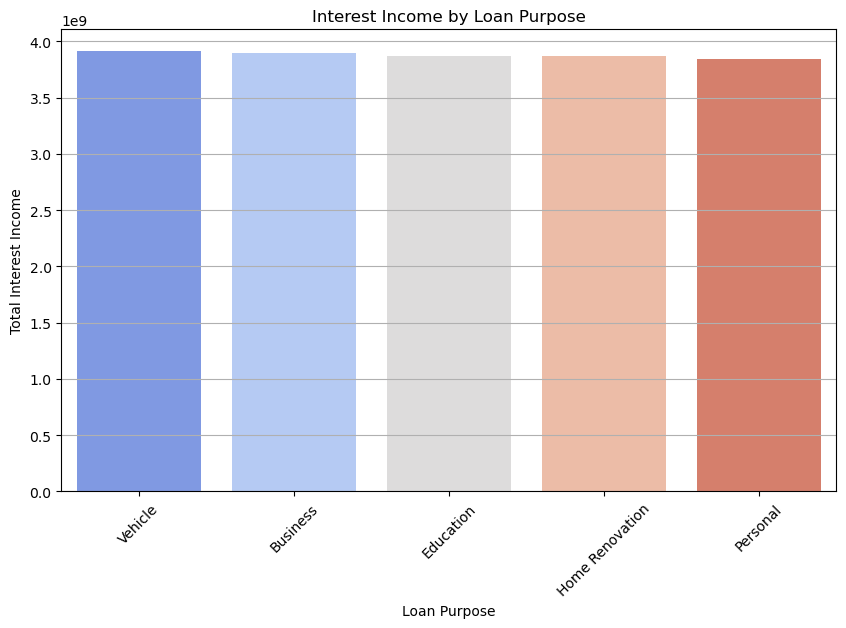

The dataset does not include columns for 'Branch_ID' or 'Region'.


In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge applications_df with loans_df on Loan_ID to connect application and disbursement data
merged_df = pd.merge(applications_df, loans_df, on='Loan_ID', how='inner')

# Ensure Interest_Rate column is numeric
merged_df['Interest_Rate'] = pd.to_numeric(merged_df['Interest_Rate'], errors='coerce')

# 1. Calculate Total Interest Income
merged_df['Interest_Income'] = merged_df['Loan_Amount'] * (merged_df['Interest_Rate'] / 100)
total_interest_income = merged_df['Interest_Income'].sum()

print(f"Total Interest Income Across All Loans: ${total_interest_income:,.2f}")

# 2. Profitability by Loan Purpose
if 'Loan_Purpose' in merged_df.columns:
    purpose_profitability = merged_df.groupby('Loan_Purpose')['Interest_Income'].sum().sort_values(ascending=False)

    print("\nMost Profitable Loan Purposes:")
    print(purpose_profitability)

    # Bar plot for loan purpose profitability
    plt.figure(figsize=(10, 6))
    sns.barplot(x=purpose_profitability.index, y=purpose_profitability.values, palette="coolwarm")
    plt.title("Interest Income by Loan Purpose")
    plt.xlabel("Loan Purpose")
    plt.ylabel("Total Interest Income")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("The dataset does not include a column for 'Loan_Purpose'.")

# 3. Branch and Regional Profitability Metrics
if 'Branch_ID' in merged_df.columns and 'Region' in merged_df.columns:
    # Profitability by Branch
    branch_profitability = merged_df.groupby('Branch_ID')['Interest_Income'].sum().sort_values(ascending=False)
    print("\nBranch Profitability:")
    print(branch_profitability)

    # Bar plot for branch profitability
    plt.figure(figsize=(10, 6))
    sns.barplot(x=branch_profitability.index, y=branch_profitability.values, palette="viridis")
    plt.title("Interest Income by Branch")
    plt.xlabel("Branch ID")
    plt.ylabel("Total Interest Income")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

    # Profitability by Region
    region_profitability = merged_df.groupby('Region')['Interest_Income'].sum().sort_values(ascending=False)
    print("\nRegional Profitability:")
    print(region_profitability)

    # Bar plot for regional profitability
    plt.figure(figsize=(10, 6))
    sns.barplot(x=region_profitability.index, y=region_profitability.values, palette="muted")
    plt.title("Interest Income by Region")
    plt.xlabel("Region")
    plt.ylabel("Total Interest Income")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
else:
    print("The dataset does not include columns for 'Branch_ID' or 'Region'.")


13. Geospatial Analysis
Map the distribution of active loans across regions.
Compare default rates across different geographic regions.
Visualize the loan disbursement trends for rural vs. urban areas.


Active Loan Distribution by Region:
Region
East         5161
West         5055
Northeast    4996
North        4988
Central      4936
South        4914
Name: Loan_ID, dtype: int64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\4177894381.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loan_distribution.index, y=loan_distribution.values, palette="coolwarm")


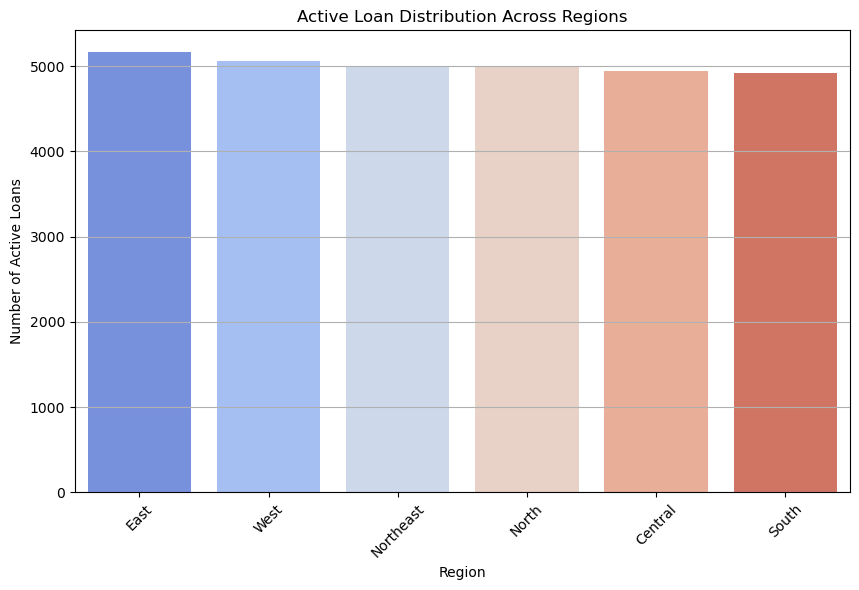

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\4177894381.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Default_Amount'].notnull().sum() / len(x))
C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\4177894381.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rates.index, y=default_rates.values, palette="muted")



Default Rates by Region:
Region
South        0.105256
West         0.104670
Central      0.100436
Northeast    0.100100
North        0.093669
East         0.093019
dtype: float64


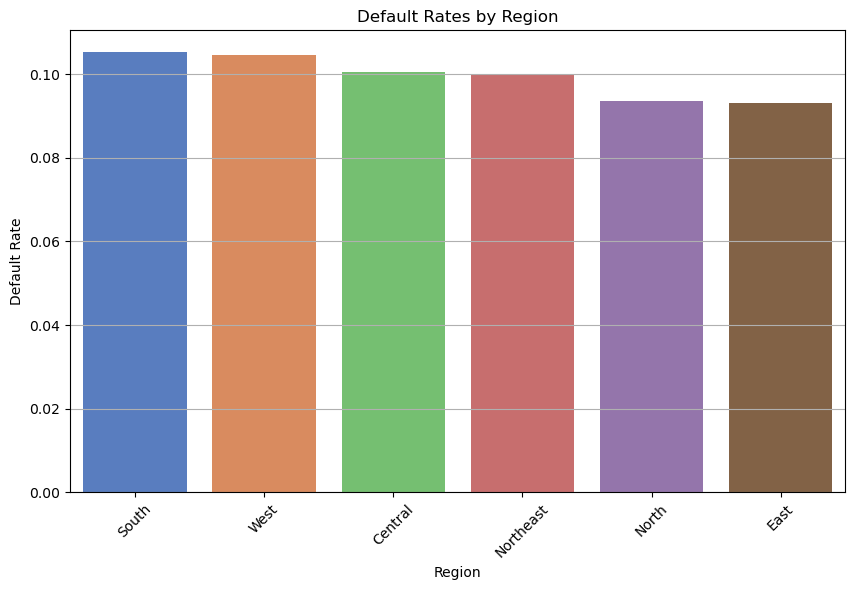

Branch information does not contain 'Rural_Urban' classification.


In [365]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Merge applications_df with loans_df on Loan_ID to connect application and disbursement data
# merged_df = pd.merge(applications_df, loans_df, on='Loan_ID', how='inner')

# 1. Map Distribution of Active Loans Across Regions
active_loans = loans_df[loans_df['Loan_Status'] == 'Active']
loan_distribution = active_loans.merge(customers_df, on='Customer_ID', how='inner').groupby('Region')['Loan_ID'].count().sort_values(ascending=False)

print("\nActive Loan Distribution by Region:")
print(loan_distribution)

# Visualize active loans by region
plt.figure(figsize=(10, 6))
sns.barplot(x=loan_distribution.index, y=loan_distribution.values, palette="coolwarm")
plt.title("Active Loan Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Active Loans")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 2. Compare Default Rates Across Regions
# Merge loans_df and defaults_df to calculate default rates
merged_defaults = loans_df.merge(customers_df, on='Customer_ID', how='inner').merge(defaults_df, on='Loan_ID', how='left')
default_rates = (
    merged_defaults.groupby('Region')
    .apply(lambda x: x['Default_Amount'].notnull().sum() / len(x))
    .sort_values(ascending=False)
)

print("\nDefault Rates by Region:")
print(default_rates)

# Visualize default rates by region
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates.index, y=default_rates.values, palette="muted")
plt.title("Default Rates by Region")
plt.xlabel("Region")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Visualize Loan Disbursement Trends (Rural vs. Urban)
if 'Rural_Urban' in branches_df.columns:
    loans_with_areas = loans_df.merge(branches_df[['Branch_ID', 'Rural_Urban']], on='Branch_ID', how='left')
    disbursement_trends = (
        loans_with_areas.groupby('Rural_Urban')['Loan_Amount']
        .sum()
        .sort_values(ascending=False)
    )

    print("\nLoan Disbursement Trends (Rural vs. Urban):")
    print(disbursement_trends)

    # Visualize disbursement trends
    plt.figure(figsize=(8, 5))
    sns.barplot(x=disbursement_trends.index, y=disbursement_trends.values, palette="viridis")
    plt.title("Loan Disbursement Trends (Rural vs. Urban)")
    plt.xlabel("Area Type")
    plt.ylabel("Total Loan Disbursement")
    plt.grid(axis='y')
    plt.show()
else:
    print("Branch information does not contain 'Rural_Urban' classification.")


14. Default Trends
Analyze the number of defaults over time to identify patterns.
Calculate the average default amount for different loan purposes.
Compare default rates across customer income categories.

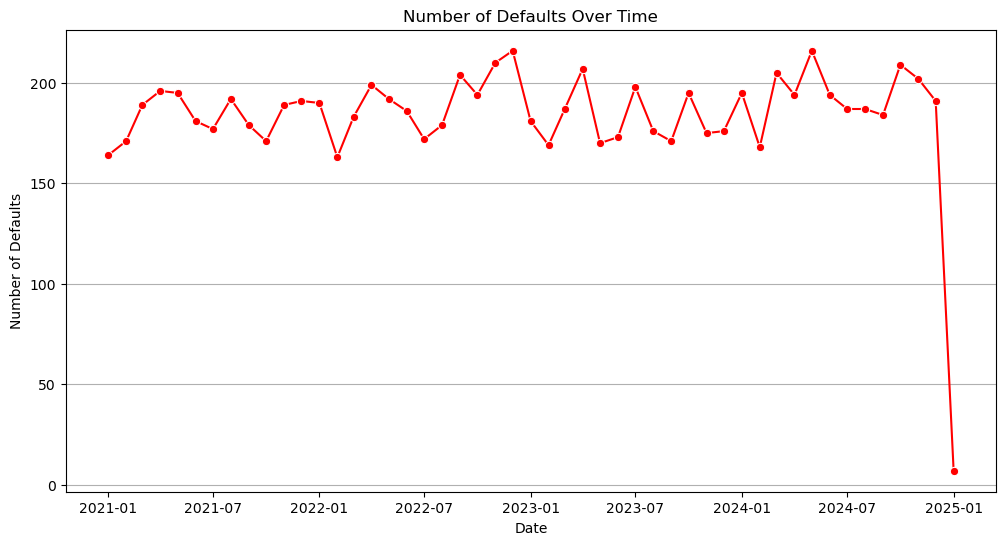


Average Default Amount by Loan Purpose:
Loan_Purpose
Education          53797.758769
Business           53261.031433
Home Renovation    53038.080028
Vehicle            52671.599578
Personal           52389.399011
Name: Default_Amount, dtype: float64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3632475993.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_default_by_purpose.index, y=avg_default_by_purpose.values, palette="coolwarm")


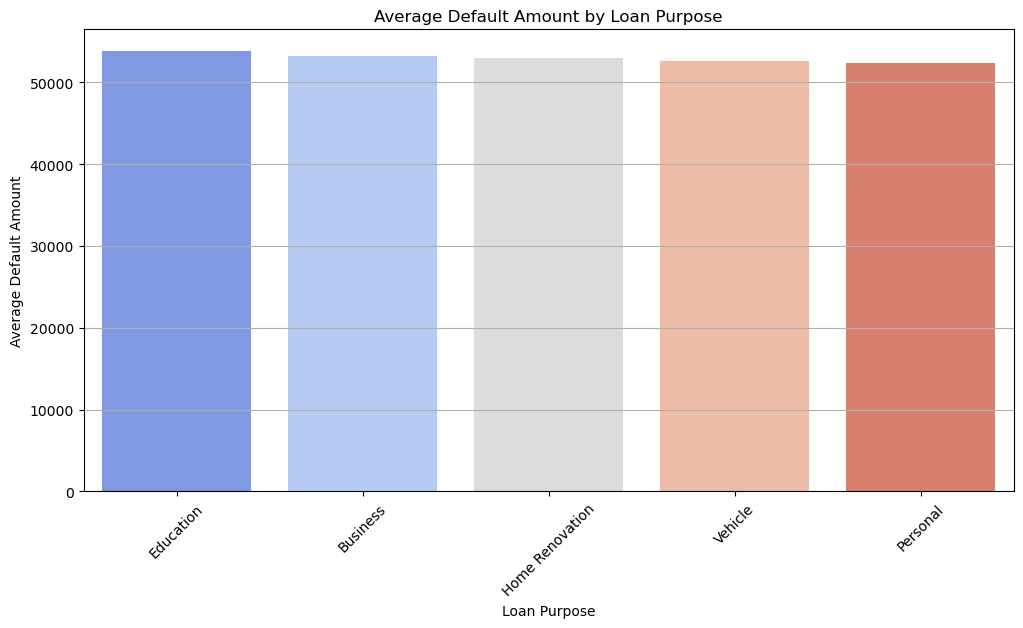

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3632475993.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_defaults.groupby('Income_Bracket')
C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3632475993.py:63: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x['Default_Amount'].sum() / len(x))
C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\3632475993.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va


Default Rates by Income Bracket:
Income_Bracket
High (>1800k)             5549.676248
Mid (600k-900k)           5307.281534
Upper-Mid (900k-1800k)    5274.847508
Lower-Mid (300k-600k)     5170.886641
Low (<300k)               5143.415970
dtype: float64


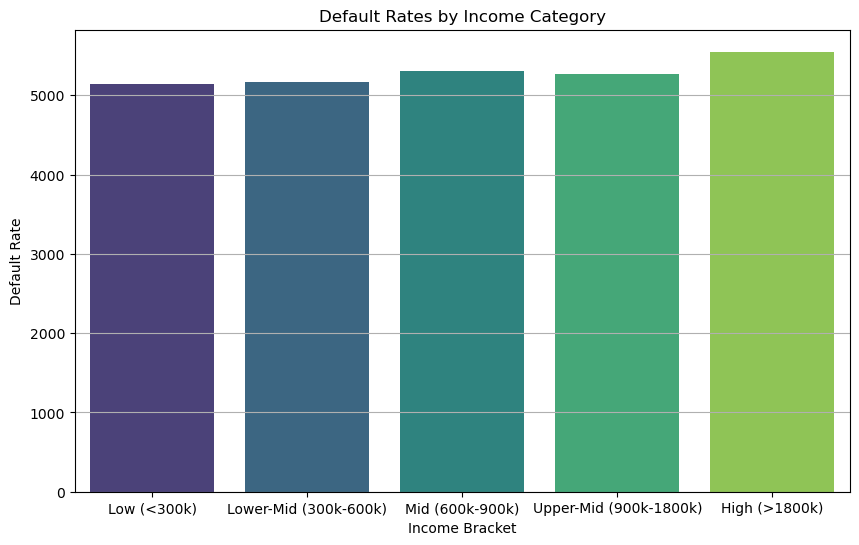

In [393]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure datasets are loaded
# Assume loans_df contains Loan_Purpose, Loan_ID, Default_Flag, Customer_Income
# Assume defaults_df contains Default_Amount and Loan_ID

# 1. Analyze Defaults Over Time
# Ensure Default_Date is in datetime format
defaults_df['Default_Date'] = pd.to_datetime(defaults_df['Default_Date'], errors='coerce')

# Aggregate defaults over time
defaults_over_time = (
    defaults_df.groupby(defaults_df['Default_Date'].dt.to_period('M'))
    .size()
    .reset_index(name='Default_Count')
)
defaults_over_time['Default_Date'] = defaults_over_time['Default_Date'].dt.to_timestamp()

# Visualize defaults over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Default_Date', y='Default_Count', data=defaults_over_time, marker='o', color='red')
plt.title("Number of Defaults Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Defaults")
plt.grid(axis='y')
plt.show()

# 2. Calculate Average Default Amount by Loan Purpose
# Merge loans_df and defaults_df
defaults_with_purpose = loans_df.merge(defaults_df[['Loan_ID', 'Default_Amount']], on='Loan_ID', how='inner').merge(applications_df[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='inner')

avg_default_by_purpose = (
    defaults_with_purpose.groupby('Loan_Purpose')['Default_Amount']
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage Default Amount by Loan Purpose:")
print(avg_default_by_purpose)

# Visualize average default amount by loan purpose
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_default_by_purpose.index, y=avg_default_by_purpose.values, palette="coolwarm")
plt.title("Average Default Amount by Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Average Default Amount")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Compare Default Rates Across Income Categories
# Create income brackets
bins = [0, 300000, 600000, 900000, 1800000, float('inf')]
labels = ['Low (<300k)', 'Lower-Mid (300k-600k)', 'Mid (600k-900k)', 'Upper-Mid (900k-1800k)', 'High (>1800k)']
customers_df['Income_Bracket'] = pd.cut(customers_df['Annual_Income'], bins=bins, labels=labels, right=False)

# Calculate default rates by income bracket
income_defaults = customers_df.merge(defaults_df[['Customer_ID','Default_Amount']], on='Customer_ID', how='left')
default_rates_by_income = (
    income_defaults.groupby('Income_Bracket')
    .apply(lambda x: x['Default_Amount'].sum() / len(x))
    .sort_values(ascending=False)
)

print("\nDefault Rates by Income Bracket:")
print(default_rates_by_income)

# Visualize default rates by income bracket
plt.figure(figsize=(10, 6))
sns.barplot(x=default_rates_by_income.index, y=default_rates_by_income.values, palette="viridis")
plt.title("Default Rates by Income Category")
plt.xlabel("Income Bracket")
plt.ylabel("Default Rate")
plt.grid(axis='y')
plt.show()


15. Branch Efficiency
Calculate the average loan disbursement time for each branch.
Identify branches with the highest number of rejected applications.
Compare branch efficiency based on customer satisfaction metrics (if available).

In [401]:
# 1. Calculate the Average Loan Disbursement Time for Each Branch

# Merge applications_df with loans_df on Loan_ID to connect application and disbursement data
merged_df = pd.merge(applications_df, loans_df, on='Loan_ID', how='inner')

# Calculate Time to Disbursement
merged_df['Time_to_Disbursement'] = (
    pd.to_datetime(merged_df['Disbursal_Date']) - pd.to_datetime(merged_df['Application_Date'])
).dt.days

# Compare Average Processing Times Across Branches
if 'Branch_ID' in merged_df.columns:
    branch_processing_times = merged_df.groupby('Branch_ID')['Time_to_Disbursement'].mean().sort_values()

    print("Average Processing Times by Branch:")
    print(branch_processing_times)

else:
    print("The dataset does not include a column for 'Branch_ID'.")

The dataset does not include a column for 'Branch_ID'.


In [420]:
# 2. Identify Branches with the Highest Number of Rejected Applications

# Filter for rejected applications
rejected_applications = applications_df[applications_df['Approval_Status'] == 'Rejected']

print("\nTotal Rejected Applications:", rejected_applications['Approval_Status'].count())

# Count the number of rejected applications per branch
if 'Branch_ID' in applications_df.columns:
    rejected_applications_by_branch = rejected_applications.groupby('Branch_ID')['Application_Status'].count()

    # Identify the branches with the highest number of rejections
    highest_rejected_branches = rejected_applications_by_branch.sort_values(ascending=False)

    print("\nBranches with Highest Number of Rejected Applications:")
    print(highest_rejected_branches)

else:
    print("The dataset does not include a column for 'Branch_ID'.")


Total Rejected Applications: 12600
12600
The dataset does not include a column for 'Branch_ID'.


In [ ]:
# 3. Compare Branch Efficiency Based on Customer Satisfaction Metrics (if available)

# Required details are not available


16. Time-Series Analysis

Analyze Monthly Loan Disbursement Trends Over the Last 5 Years:

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_3308\541933505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_5_years_data['Year-Month'] = last_5_years_data['Disbursement_Date'].dt.to_period('M')


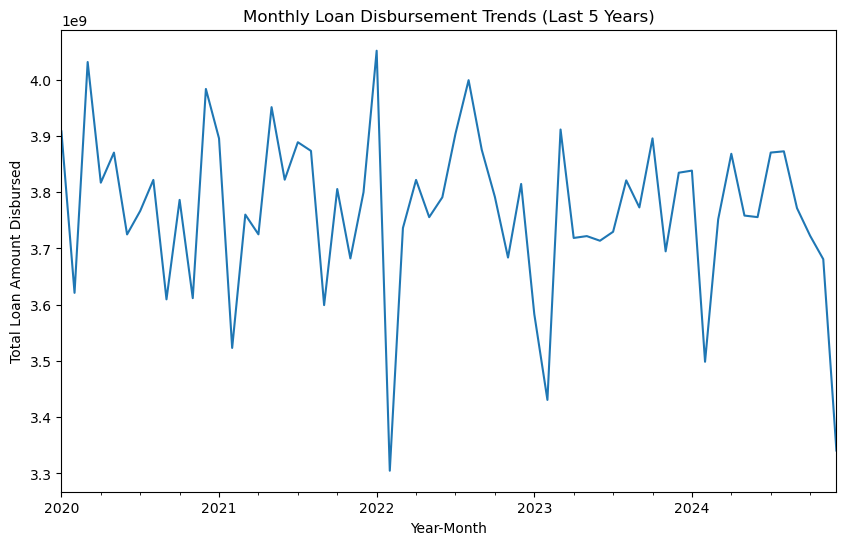

In [431]:
# Ensure your Loan Data includes disbursement dates
loans_df['Disbursement_Date'] = pd.to_datetime(loans_df['Disbursal_Date'])  # Ensure it's datetime type

# Filter data for the last 5 years
last_5_years_data = loans_df[loans_df['Disbursement_Date'] >= '2020-01-01']

# Extract year and month from the Disbursement Date
last_5_years_data['Year-Month'] = last_5_years_data['Disbursement_Date'].dt.to_period('M')

# Group by Year-Month and sum the loan disbursements
monthly_disbursement = last_5_years_data.groupby('Year-Month')['Loan_Amount'].sum()

# Plot the trends
import matplotlib.pyplot as plt

monthly_disbursement.plot(kind='line', figsize=(10,6))
plt.title('Monthly Loan Disbursement Trends (Last 5 Years)')
plt.xlabel('Year-Month')
plt.ylabel('Total Loan Amount Disbursed')
plt.show()


Identify Seasonal Patterns in Loan Applications and Disbursements:

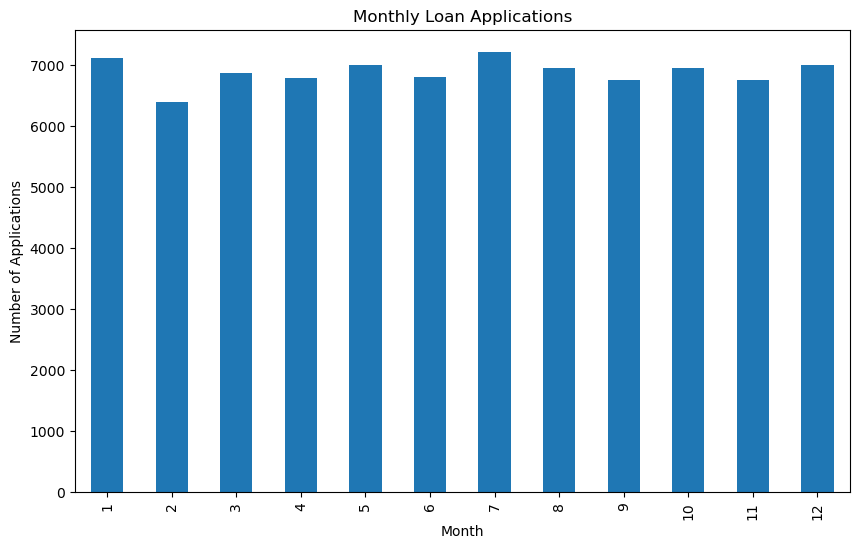

In [437]:
# Extract month and year
applications_df['Month'] = applications_df['Application_Date'].dt.month
applications_df['Year'] = applications_df['Application_Date'].dt.year

# Group by month to identify seasonal patterns
monthly_applications = applications_df.groupby('Month')['Application_ID'].count()

# Plot seasonal trend
monthly_applications.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Loan Applications')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.show()


Compare Monthly Default Rates Across Regions:

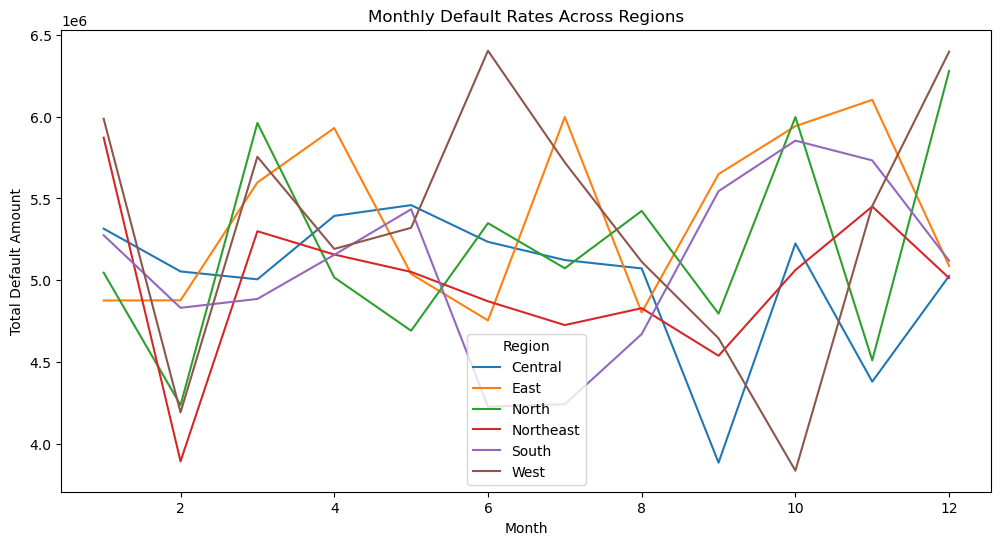

In [449]:
# Merge Default Records with Branch Information
defaults_with_regions = defaults_df.merge(customers_df[['Customer_ID', 'Region']], on='Customer_ID')

# Extract month and year of default date
defaults_with_regions['Month'] = defaults_with_regions['Default_Date'].dt.month
defaults_with_regions['Year'] = defaults_with_regions['Default_Date'].dt.year

# Group by Region and Month to calculate the default rate per region
monthly_default_rates = defaults_with_regions.groupby(['Month', 'Region'])['Default_Amount'].sum()

# Plot default rates across regions
monthly_default_rates.unstack().plot(kind='line', figsize=(12,6))
plt.title('Monthly Default Rates Across Regions')
plt.xlabel('Month')
plt.ylabel('Total Default Amount')
plt.legend(title='Region')
plt.show()


17. Customer Behavior Analysis

Categorize Customers Based on Their Repayment Behavior:

In [473]:
# Create a repayment status column by checking if the customer defaulted
loans_df['Repayment_Status'] = loans_df['Customer_ID'].apply(lambda x: 'Defaulter' if x in defaults_df['Customer_ID'].values else 'OnTime')

# Segment customers based on their repayment history
repayment_behavior = loans_df.groupby('Customer_ID')['Repayment_Status'].apply(lambda x: 'Frequent Defaulter' if (x == 'Defaulter').sum() > 3 else 'Occasional Defaulter' if (x == 'Defaulter').sum() > 0 else 'Always On Time')

print(repayment_behavior.head())
loans_df

Customer_ID
C000003    Always On Time
C000004    Always On Time
C000005    Always On Time
C000007    Always On Time
C000008    Always On Time
Name: Repayment_Status, dtype: object


,Loan_ID,Customer_ID,Loan_Amount,Interest_Rate,Loan_Term,Disbursal_Date,Repayment_Start_Date,Repayment_End_Date,Loan_Status,Overdue_Amount,EMI_Amount,Collateral_Details,Interest_Income,Disbursement_Date,Repayment_Status
0,L000001,C045929,4030468,8.45,24,2023-03-25,2023-04-25,2025-03-25,Active,0,18668,Property,340574.5460,2023-03-25,OnTime
1,L000002,C038991,3498647,11.90,48,2023-10-23,2023-11-23,2027-10-23,Closed,44003,36012,Property,416338.9930,2023-10-23,OnTime
2,L000003,C046662,4871438,9.74,24,2024-07-30,2024-08-30,2026-07-30,Overdue,0,26347,NaN,474478.0612,2024-07-30,OnTime
3,L000004,C040268,541515,13.55,24,2024-11-22,2024-12-22,2026-11-22,Active,0,16106,NaN,73375.2825,2024-11-22,OnTime
4,L000005,C067057,631036,10.10,36,2024-03-30,2024-04-30,2027-03-30,Overdue,0,10127,NaN,63734.6360,2024-03-30,OnTime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,L089996,C062366,4932615,12.68,36,2023-03-04,2023-04-04,2026-03-04,Closed,0,97438,Vehicle,625455.5820,2023-03-04,OnTime
89996,L089997,C010516,4493121,11.98,48,2022-11-02,2022-12-02,2026-11-02,Overdue,0,99628,Vehicle,538275.8958,2022-11-02,Defaulter
89997,L089998,C052676,4107372,13.26,48,2024-11-26,2024-12-26,2028-11-26,Closed,24135,42926,NaN,544637.5272,2024-11-26,OnTime
89998,L089999,C068124,100576,8.69,12,2024-12-23,2025-01-23,2025-12-23,Active,1262,3370,NaN,8740.0544,2024-12-23,OnTime


Analyze Patterns in Loan Approval and Rejection Reasons Segmented by Customer Demographics:

In [475]:
# Merge Loan Applications with Customer Demographics
applications_with_demographics = applications_df.merge(customers_df[['Customer_ID', 'Annual_Income', 'Credit_Score', 'Employment_Status']], on='Customer_ID', how='left')

# Analyze rejection reasons by customer demographics
rejected_apps = applications_with_demographics[applications_with_demographics['Approval_Status'] == 'Rejected']
rejection_patterns = rejected_apps.groupby(['Rejection_Reason', 'Employment_Status'])['Application_ID'].count()

print(rejection_patterns)


Rejection_Reason      Employment_Status
Incomplete Documents  Salaried             1422
                      Self-Employed        1338
                      Unemployed           1444
Insufficient Income   Salaried             1330
                      Self-Employed        1365
                      Unemployed           1404
Low Credit Score      Salaried             1378
                      Self-Employed        1443
                      Unemployed           1476
Name: Application_ID, dtype: int64


Identify High-Value Customers with Consistent Repayment Histories:

In [56]:
# Create a repayment status column by checking if the customer defaulted
loans_df['Repayment_Status'] = loans_df['Customer_ID'].apply(lambda x: 'Defaulter' if x in defaults_df['Customer_ID'].values else 'OnTime')
loans_df

# Assuming customers with high credit scores and high loan amounts are considered high-value
high_value_customers = customers_df[(customers_df['Credit_Score'] > 750) & (loans_df['Loan_Amount'] > 500000)]
high_value_customers

# Filter these customers to those with no defaults
# high_value_customers_no_default = high_value_customers[high_value_customers['Repayment_Status'] == 'Always On Time']


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\1099824086.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_value_customers = customers_df[(customers_df['Credit_Score'] > 750) & (loans_df['Loan_Amount'] > 500000)]


,Customer_ID,Full_Name,Contact_Number,Email,Address,Age,Gender,Marital_Status,Employment_Status,Annual_Income,Credit_Score,Region,Account_Tenure,Relationship_Manager_ID
9,C000010,Shaan Varkey,2945937816,anay74@gmail.com,52/94\nGanesan Chowk\nDibrugarh-707491,60,Other,Divorced,Salaried,1734948,789,East,15 Years,RM0138
16,C000017,Purab Thaker,5962588263,arnavsom@hotmail.com,"77, Gaba Nagar, Aligarh 955025",60,Male,Married,Self-Employed,1776242,757,South,8 Years,RM0378
17,C000018,Saanvi Kalita,577044677,ojas70@sarma.com,"39\nChander Zila, Pondicherry-955148",35,Female,Married,Salaried,554487,762,North,13 Years,RM0137
24,C000025,Ryan Shenoy,5071278642,pihu46@goel-sinha.info,"853\nBakshi Chowk, Ambattur 936784",22,Female,Divorced,Salaried,228040,760,Northeast,12 Years,RM0094
27,C000028,Diya Comar,3500528652,nrao@bera-lad.net,"467\nBarad Nagar, Gangtok-866586",21,Female,Married,Salaried,358430,759,West,5 Years,RM0012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69986,C069987,Mohanlal Vig,910265968459,parisubramanian@barad.com,"59/002, Kota Road, Kanpur 003148",24,Male,Married,Unemployed,1906834,818,South,12 Years,RM0075
69988,C069989,Dishani Gour,916286839526,vvarughese@yahoo.com,"18\nKamdar Road, Ambattur 789143",51,Female,Divorced,Unemployed,1488808,797,South,8 Years,RM0392
69996,C069997,Dharmajan Mall,2650655450,elakshi28@hotmail.com,"87/83, Rout Path\nNorth Dumdum-053905",56,Female,Single,Unemployed,1927952,824,South,9 Years,RM0382
69998,C069999,Shaan Brar,911251433283,ckurian@hotmail.com,14/928\nDin Zila\nNew Delhi-319692,57,Male,Divorced,Salaried,812186,819,Northeast,2 Years,RM0295


18. Risk Assessment

Develop a Risk Matrix for Loan Products:

In [66]:
# Merge Loan data with Defaults data
merged_data = loans_df.merge(defaults_df[['Default_Amount', 'Loan_ID']], on=['Loan_ID'], how='left')

# # Risk matrix: Higher Default_Amount, longer Loan_Term, and higher Interest_Rate increases risk
merged_data['Risk_Score'] = merged_data['Default_Amount'] * merged_data['Loan_Term'] * merged_data['Interest_Rate']
merged_data

# # Rank loans by risk
loan_data_sorted_by_risk = merged_data.sort_values(by='Risk_Score', ascending=False)


Rank Loan Types by Risk Level:

In [72]:
loan_data_sorted_by_risk['Loan_Type_Risk'] = loan_data_sorted_by_risk.groupby('Loan_ID')['Risk_Score'].rank(ascending=False)

Analyze High-Risk Customer Segments by Credit Score and Income:

In [87]:
# High-risk customers: Lower credit score and lower income
high_risk_customers = customers_df[(customers_df['Credit_Score'] < 600) & (customers_df['Annual_Income'] < 210000)]
high_risk_customers

,Customer_ID,Full_Name,Contact_Number,Email,Address,Age,Gender,Marital_Status,Employment_Status,Annual_Income,Credit_Score,Region,Account_Tenure,Relationship_Manager_ID
1063,C001064,Yasmin Aurora,4433902683,hrau@hotmail.com,"H.No. 994, Bhakta Path, Surat 475877",56,Other,Married,Unemployed,203411,552,Central,2 Years,RM0123
1656,C001657,Nirvaan Sur,5619390837,sidhufateh@yahoo.com,H.No. 782\nBehl Circle\nMorbi 228851,35,Other,Single,Salaried,201037,364,North,15 Years,RM0054
2475,C002476,Lakshit Gulati,940919566,dugarshlok@gmail.com,"14\nSachdeva Path, Ozhukarai 493480",39,Female,Single,Unemployed,202855,423,West,1 Years,RM0395
3191,C003192,Ayesha Randhawa,918022545186,zarasehgal@hotmail.com,H.No. 62\nBuch\nDehri 434759,59,Other,Divorced,Salaried,208974,500,Central,4 Years,RM0292
4085,C004086,Yashvi Khurana,95663593,mishtidhawan@hotmail.com,"91/823, Sandal Road\nHapur-937604",46,Female,Divorced,Self-Employed,207331,526,Northeast,4 Years,RM0381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69309,C069310,Badal Kala,6182189980,eshanibajaj@gara.com,"H.No. 368, Jani Street\nKhandwa-944625",57,Other,Divorced,Salaried,205700,343,East,7 Years,RM0180
69485,C069486,Shayak Sinha,915500769470,qbanerjee@hotmail.com,"H.No. 13, Vohra Zila, Hazaribagh-764841",37,Female,Divorced,Unemployed,205058,401,Northeast,10 Years,RM0109
69629,C069630,Ehsaan Bhavsar,914488152383,sulevivaan@goda-grewal.net,"65\nDash Chowk, Bangalore-832368",68,Female,Divorced,Unemployed,207360,382,Central,9 Years,RM0440
69666,C069667,Dishani Sagar,2222646373,tanyasehgal@dhillon.net,H.No. 932\nDave Path\nKatihar 095282,47,Female,Married,Salaried,204562,345,Central,9 Years,RM0243


19. Time to Default Analysis

Calculate the average time from loan disbursement to default for overdue loans.

Identify loan purposes with the shortest time to default.

Compare the time to default across customer demographics.

Average Time to Default (Days): 199.20

Shortest Time to Default by Loan Purpose:
Loan_Purpose
Vehicle            187.212335
Home Renovation    200.198118
Personal           200.601559
Business           200.727989
Education          207.481698
Name: Time_to_Default, dtype: float64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\510908429.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shortest_time_by_purpose.values, y=shortest_time_by_purpose.index, palette="coolwarm")


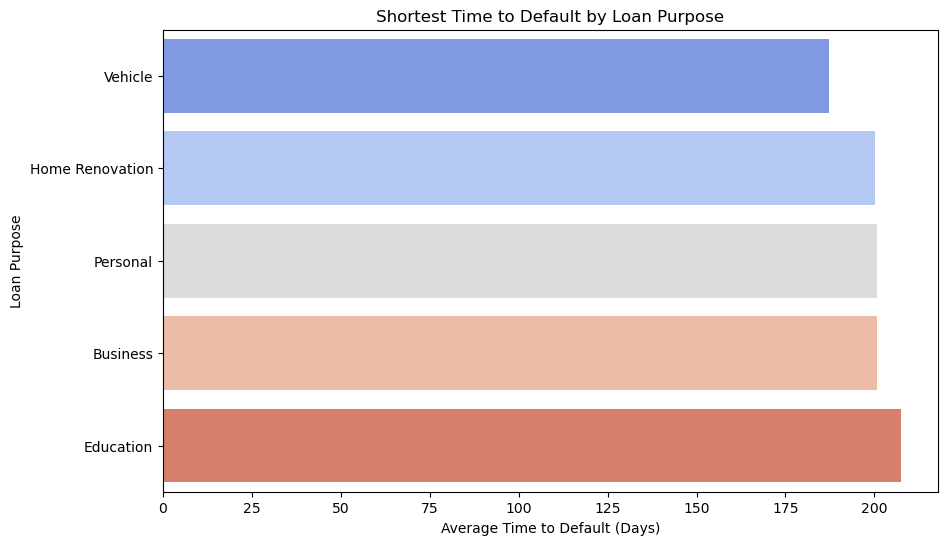

C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\510908429.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overdue_loans.groupby('Age_Group')['Time_to_Default']
C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\510908429.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_by_age_group.index, y=time_by_age_group.values, palette="viridis")



Average Time to Default by Age Group:
Age_Group
25-34    174.334015
65+      181.955372
18-24    185.326087
50-64    205.736985
35-49    221.740586
Name: Time_to_Default, dtype: float64


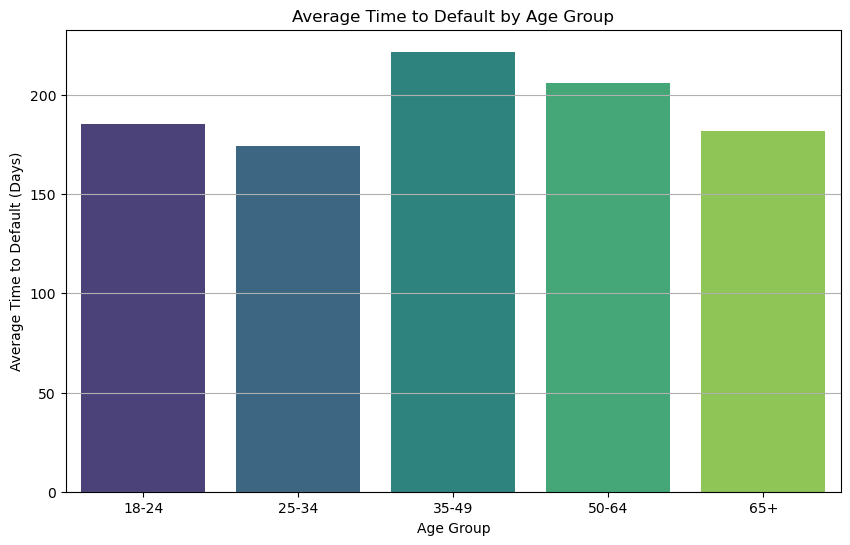


Average Time to Default by Income Bracket:
Income_Bracket
Mid (600k-900k)           181.141928
Low (<300k)               187.158537
Upper-Mid (900k-1800k)    198.999058
High (>1800k)             201.445870
Lower-Mid (300k-600k)     222.376279
Name: Time_to_Default, dtype: float64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\510908429.py:81: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  overdue_loans.groupby('Income_Bracket')['Time_to_Default']
C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\510908429.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_by_income_bracket.index, y=time_by_income_bracket.values, palette="plasma")


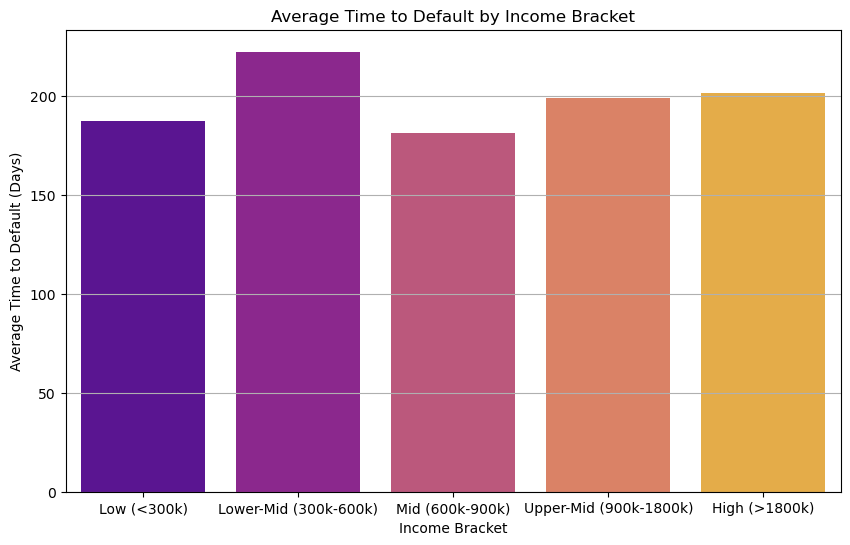


Average Time to Default by Region:
Region
Central      174.572722
North        180.214247
Northeast    199.473591
South        203.295082
West         216.301758
East         219.155497
Name: Time_to_Default, dtype: float64


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\510908429.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_by_region.index, y=time_by_region.values, palette="cubehelix")


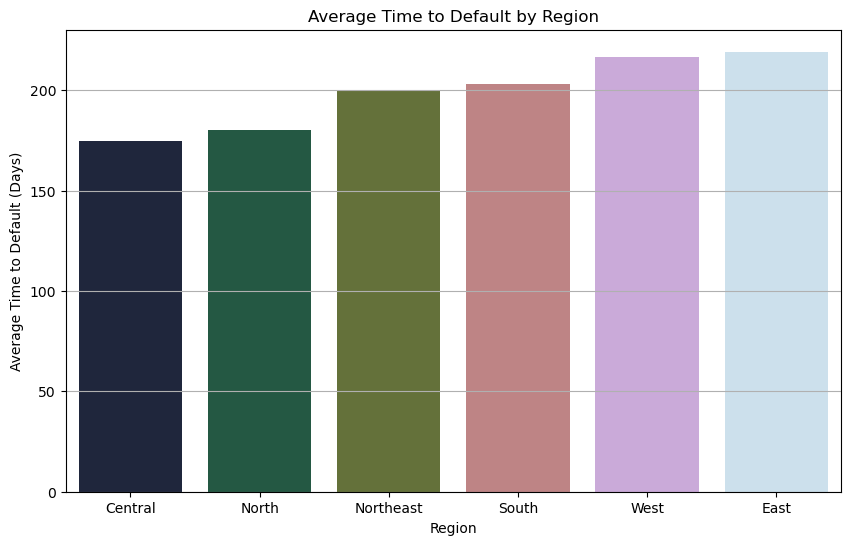

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Merge applications_df with loans_df on Loan_ID to connect application and disbursement data
merged_df = loans_df.merge(applications_df, on='Customer_ID', how='inner')
merged_df = merged_df.merge(defaults_df, on='Customer_ID', how='inner')
merged_df = merged_df.merge(customers_df, on='Customer_ID', how='inner')

# Ensure the necessary columns exist in loans_df
required_columns = ['Loan_ID', 'Disbursal_Date', 'Default_Date', 'Loan_Purpose', 'Age', 'Annual_Income', 'Region']
if not all(col in merged_df.columns for col in required_columns):
    raise ValueError("Some required columns are missing in the loans_df dataset.")

# Convert Disbursement_Date and Default_Date to datetime
merged_df['Disbursal_Date'] = pd.to_datetime(merged_df['Disbursal_Date'], errors='coerce')
merged_df['Default_Date'] = pd.to_datetime(merged_df['Default_Date'], errors='coerce')

# Calculate time to default in days
merged_df['Time_to_Default'] = (merged_df['Default_Date'] - merged_df['Disbursal_Date']).dt.days

# Filter overdue loans (non-NaN Time_to_Default)
overdue_loans = merged_df[merged_df['Time_to_Default'].notnull()]

# --- 1. Average Time to Default ---
avg_time_to_default = overdue_loans['Time_to_Default'].mean()
print(f"Average Time to Default (Days): {avg_time_to_default:.2f}")

# --- 2. Shortest Time to Default by Loan Purpose ---
shortest_time_by_purpose = (
    overdue_loans.groupby('Loan_Purpose')['Time_to_Default']
    .mean()
    .sort_values()
)

print("\nShortest Time to Default by Loan Purpose:")
print(shortest_time_by_purpose)

# Visualize shortest time to default by purpose
plt.figure(figsize=(10, 6))
sns.barplot(x=shortest_time_by_purpose.values, y=shortest_time_by_purpose.index, palette="coolwarm")
plt.title("Shortest Time to Default by Loan Purpose")
plt.xlabel("Average Time to Default (Days)")
plt.ylabel("Loan Purpose")
plt.show()

# --- 3. Time to Default Across Demographics ---
# Categorize customers by age
bins = [18, 25, 35, 50, 65, 100]
labels = ['18-24', '25-34', '35-49', '50-64', '65+']
overdue_loans['Age_Group'] = pd.cut(overdue_loans['Age'], bins=bins, labels=labels, right=False)

# Categorize customers by income
income_bins = [0, 300000, 600000, 900000, 1800000, float('inf')]
income_labels = ['Low (<300k)', 'Lower-Mid (300k-600k)', 'Mid (600k-900k)', 'Upper-Mid (900k-1800k)', 'High (>1800k)']
overdue_loans['Income_Bracket'] = pd.cut(overdue_loans['Annual_Income'], bins=income_bins, labels=income_labels, right=False)

# Average time to default by age group
time_by_age_group = (
    overdue_loans.groupby('Age_Group')['Time_to_Default']
    .mean()
    .sort_values()
)

print("\nAverage Time to Default by Age Group:")
print(time_by_age_group)

# Visualize time to default by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=time_by_age_group.index, y=time_by_age_group.values, palette="viridis")
plt.title("Average Time to Default by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Time to Default (Days)")
plt.grid(axis='y')
plt.show()

# Average time to default by income bracket
time_by_income_bracket = (
    overdue_loans.groupby('Income_Bracket')['Time_to_Default']
    .mean()
    .sort_values()
)

print("\nAverage Time to Default by Income Bracket:")
print(time_by_income_bracket)

# Visualize time to default by income bracket
plt.figure(figsize=(10, 6))
sns.barplot(x=time_by_income_bracket.index, y=time_by_income_bracket.values, palette="plasma")
plt.title("Average Time to Default by Income Bracket")
plt.xlabel("Income Bracket")
plt.ylabel("Average Time to Default (Days)")
plt.grid(axis='y')
plt.show()

# Average time to default by region
time_by_region = (
    overdue_loans.groupby('Region')['Time_to_Default']
    .mean()
    .sort_values()
)

print("\nAverage Time to Default by Region:")
print(time_by_region)

# Visualize time to default by region
plt.figure(figsize=(10, 6))
sns.barplot(x=time_by_region.index, y=time_by_region.values, palette="cubehelix")
plt.title("Average Time to Default by Region")
plt.xlabel("Region")
plt.ylabel("Average Time to Default (Days)")
plt.grid(axis='y')
plt.show()


20. Transaction Pattern Analysis

Identify customers with irregular repayment patterns.

Analyze penalty payments as a proportion of total transactions.

Compare transaction amounts for overdue vs. non-overdue loans.


Customers with High Penalty Proportions (>20%):
      Customer_ID  Penalty_Proportion
0         C000003            0.222222
1         C000004            0.384615
2         C000005            0.500000
3         C000007            0.625000
4         C000008            0.666667
...           ...                 ...
50585     C069994            0.750000
50586     C069997            0.500000
50587     C069998            0.600000
50588     C069999            0.428571
50589     C070000            0.476190

[47155 rows x 2 columns]


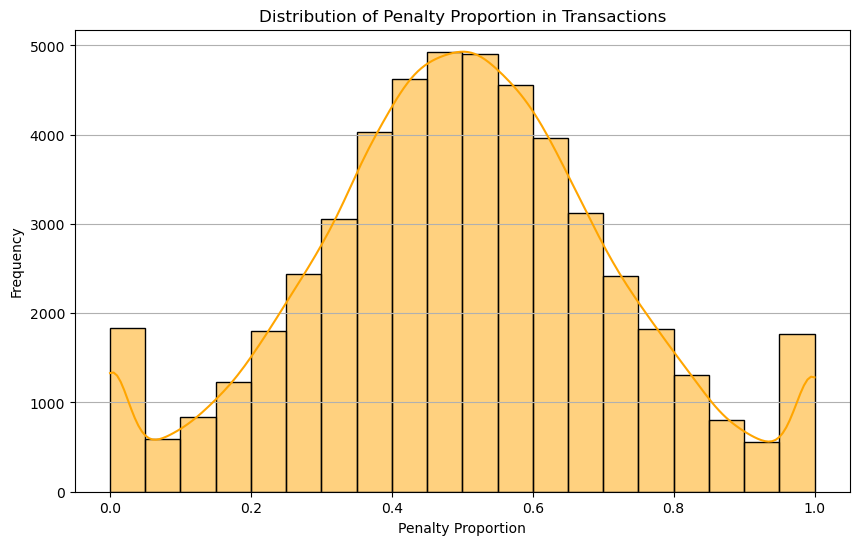


Transaction Amount Comparison for Overdue vs. Non-Overdue Loans:
                 count          mean           std     min      25%      50%  \
Overdue_Flag                                                                   
False         247912.0  25462.476459  14156.105728  1000.0  13229.0  25455.0   
True          247088.0  25530.485451  14131.846521  1000.0  13333.0  25528.0   

                  75%      max  
Overdue_Flag                    
False         37706.0  50000.0  
True          37750.0  50000.0  


C:\Users\Dipesh\AppData\Local\Temp\ipykernel_9304\396665356.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


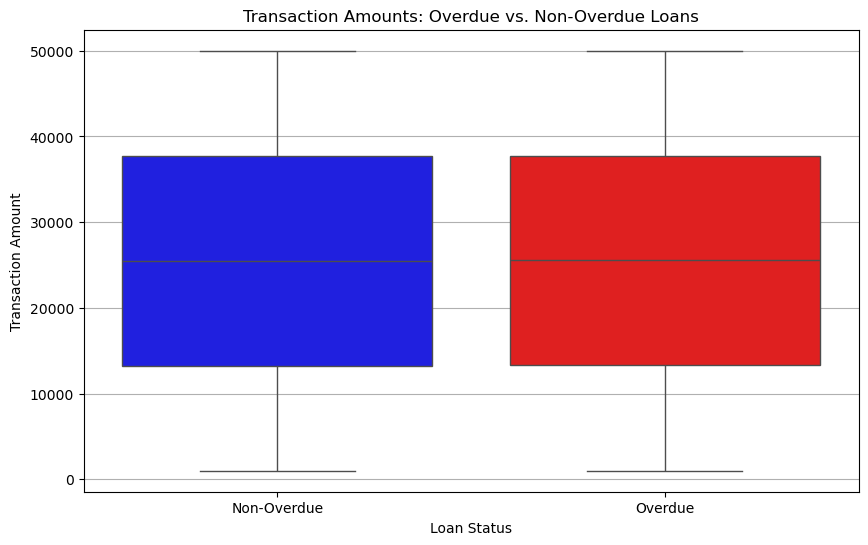

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure required columns exist in transactions_df and loans_df
required_transaction_cols = ['Customer_ID', 'Loan_ID', 'Transaction_Date', 'Amount', 'Payment_Type']
required_loan_cols = ['Loan_ID', 'Overdue_Amount']
if not all(col in transactions_df.columns for col in required_transaction_cols):
    raise ValueError("Some required columns are missing in the transactions_df dataset.")
if not all(col in loans_df.columns for col in required_loan_cols):
    raise ValueError("Some required columns are missing in the loans_df dataset.")

# --- 1. Identify Customers with Irregular Repayment Patterns ---
# Calculate the proportion of penalty payments for each customer
transactions_df['Penalty_Flag'] = transactions_df['Payment_Type'].str.lower() == 'penalty'
penalty_proportions = (
    transactions_df.groupby('Customer_ID')['Penalty_Flag']
    .mean()
    .reset_index()
    .rename(columns={'Penalty_Flag': 'Penalty_Proportion'})
)

# Flag customers with high penalty proportions (e.g., >20%)
high_penalty_customers = penalty_proportions[penalty_proportions['Penalty_Proportion'] > 0.2]
print("\nCustomers with High Penalty Proportions (>20%):")
print(high_penalty_customers)

# --- 2. Analyze Penalty Payments as a Proportion of Total Transactions ---
# Calculate total transaction amount and penalty amount by customer
transaction_summary = (
    transactions_df.groupby('Customer_ID')
    .agg(
        Total_Transaction_Amount=('Amount', 'sum'),
        Total_Penalty_Amount=('Amount', lambda x: x[transactions_df['Penalty_Flag']].sum())
    )
    .reset_index()
)

transaction_summary['Penalty_Proportion'] = (
    transaction_summary['Total_Penalty_Amount'] / transaction_summary['Total_Transaction_Amount']
)

# Visualize penalty proportions
plt.figure(figsize=(10, 6))
sns.histplot(transaction_summary['Penalty_Proportion'], bins=20, kde=True, color='orange')
plt.title("Distribution of Penalty Proportion in Transactions")
plt.xlabel("Penalty Proportion")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

# --- 3. Compare Transaction Amounts for Overdue vs. Non-Overdue Loans ---
# Merge transactions with loans to get overdue status
transactions_with_loans = transactions_df.merge(
    loans_df[['Loan_ID', 'Overdue_Amount']],
    on='Loan_ID',
    how='left'
)

# Categorize loans into overdue and non-overdue
transactions_with_loans['Overdue_Flag'] = transactions_with_loans['Overdue_Amount'] > 0

# Compare transaction amounts
transaction_comparison = transactions_with_loans.groupby('Overdue_Flag')['Amount'].describe()

print("\nTransaction Amount Comparison for Overdue vs. Non-Overdue Loans:")
print(transaction_comparison)

# Visualize transaction amount comparison
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=transactions_with_loans,
    x='Overdue_Flag',
    y='Amount',
    palette=['blue', 'red']
)
plt.title("Transaction Amounts: Overdue vs. Non-Overdue Loans")
plt.xticks([0, 1], ['Non-Overdue', 'Overdue'])
plt.xlabel("Loan Status")
plt.ylabel("Transaction Amount")
plt.grid(axis='y')
plt.show()
